**Regerssion**

**Temperature Dataset**

In [183]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/Temperature Dataset.xlsx")
data_Tem = df.to_numpy()

**preparing data**

In [186]:
data = data_Tem
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_8200\101504477.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_8200\101504477.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**initialize conventional MLP**

In [74]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 30, 20, 1
eta = 1
epoch = 30

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)


**implemention conventional MLP**

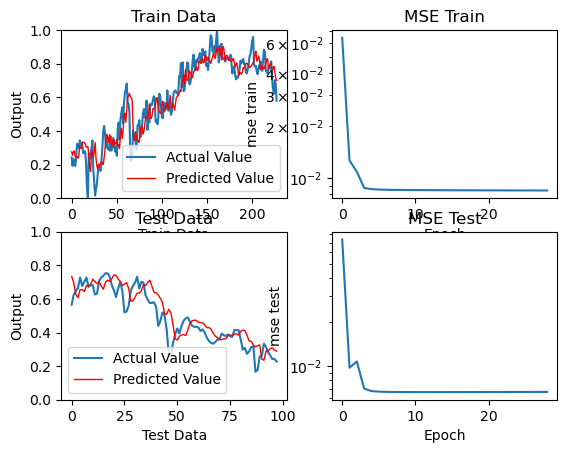

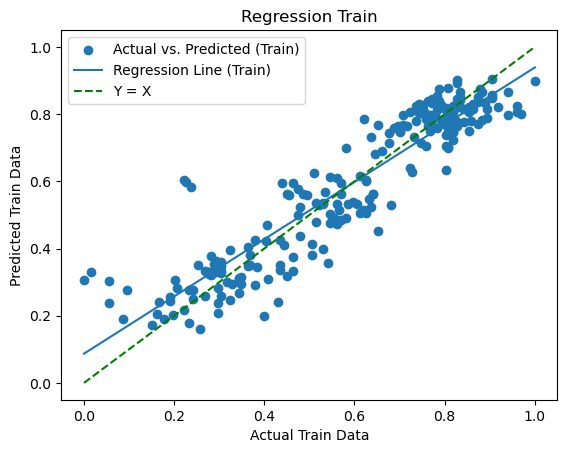

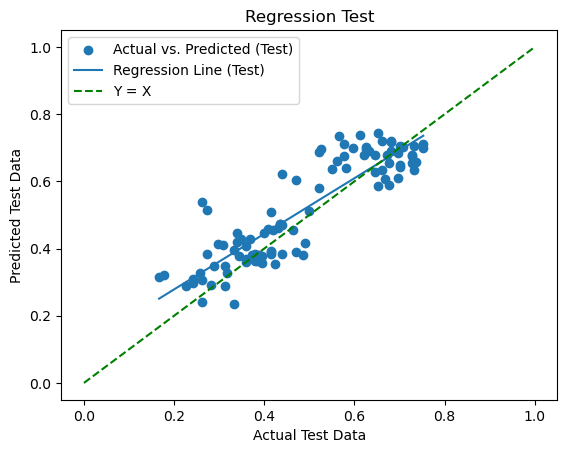

In [77]:
for t in range(epoch):
    error = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3                             # 1 * 1
        target = data[i, 5]
        error[i] = target - o3

        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100

        pw1 = -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2 = -1 * np.dot(w3, A).T * o1.T # 20 * 100
        pw3 = -1 * 1 * o2.T   # 1 * 20
        pbi1 = -1 * np.dot(np.dot(w3, A),np.dot(w2,B))
        pbi2 = -1 * np.dot(w3, A)
        pbi3 = -1

        a = pw1.ravel() # 1 * 300
        b = pw2.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        d = pbi1.ravel()
        e = pbi2.ravel()
        f = np.array([pbi3])

        w_par[i, :] = np.concatenate((a, b, c, d, e, f))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[i, 5]
        output_data_train[i] = o3
        error_square_train[i] = (target - o3) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error_square_test[i] = (target - o3) ** 2

    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.ylim(0, 1)
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.ylim(0, 1)
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**initialize Emotional MLP**

In [381]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 30, 20, 1
eta = 0.9
epoch = 30

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4
# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b, n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

**implemention Emotional MLP**

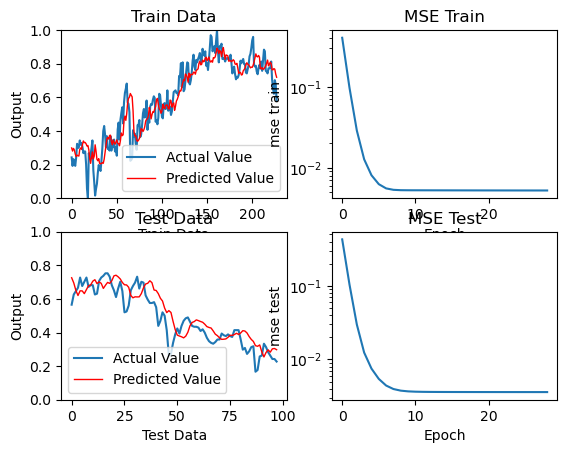

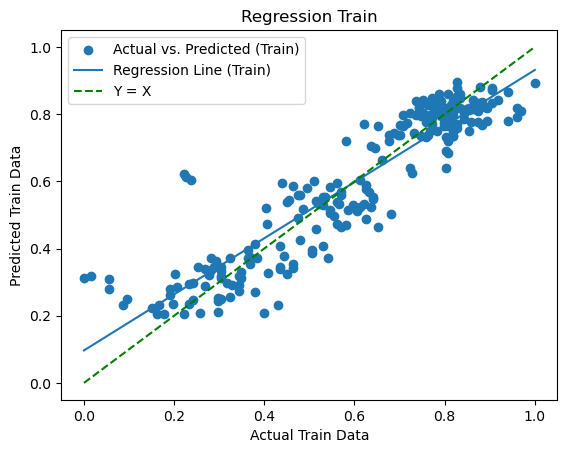

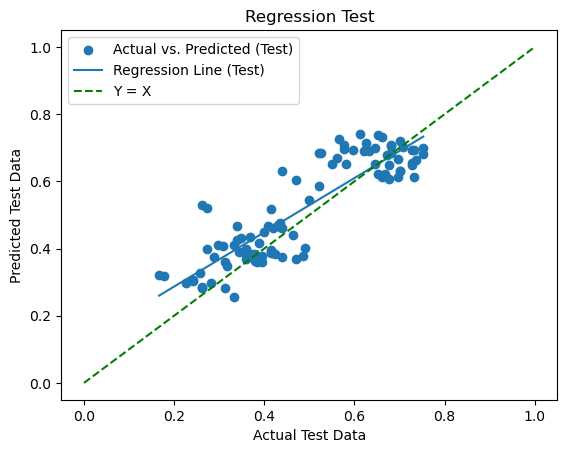

In [383]:
for t in range(epoch):
    error = np.zeros(num_train)
    r = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3                             # 1 * 1
        target = data[i, 5]
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        #t1 = (o2/2) * (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20


        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100

        pw1 = (k1 + k2) * -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2 = (k1 + k2) * -1 * np.dot(w3, A).T * o1.T # 20 * 100
        pw3 = (k1 + k2) * -1 * 1 * o2.T   # 1 * 20
        pbi1 = (k1 + k2) * -1 * np.dot(np.dot(w3, A),np.dot(w2,B))
        pbi2 = (k1 + k2) * -1 * np.dot(w3, A)
        pbi3 = (k1 + k2) * -1

        a = pw1.ravel() # 1 * 300
        b = pw2.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        d = pbi1.ravel()
        e = pbi2.ravel()
        f = np.array([pbi3])

        w_par[i, :] = np.concatenate((a, b, c, d, e, f))

    a1 = w1.ravel() # 1 * 300
    b1 = w2.ravel() # 1 * 2000
    c1 = w3.ravel() # 1 * 20
    d1 = bi1.ravel()
    e1 = bi2.ravel()
    f1 = bi3.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2

    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.ylim(0, 1)
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.ylim(0, 1)
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize Flexible MLP**

In [109]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 30, 20, 1
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 1
epoch = 30

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
palpha1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
palpha2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

871


**implemention Flexible MLP**

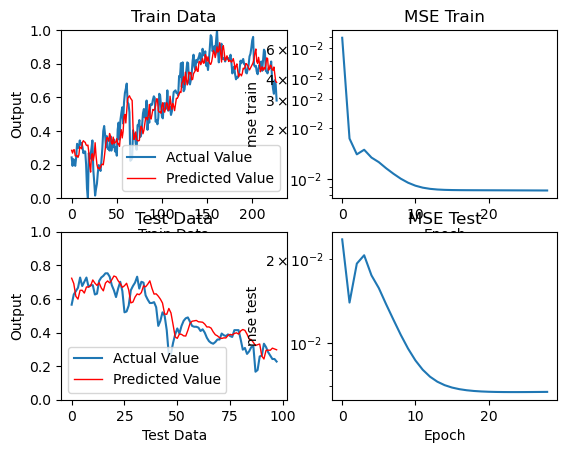

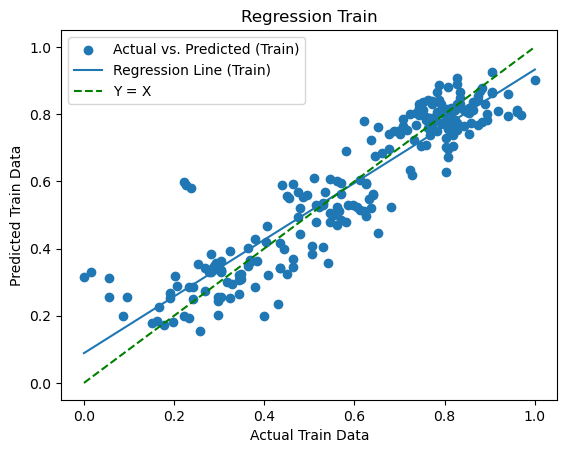

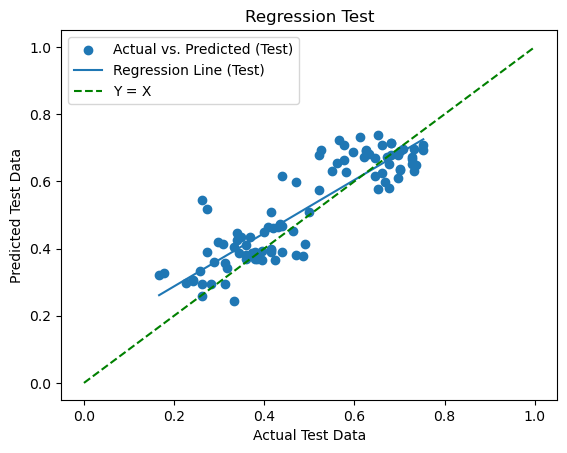

In [112]:
for t in range(epoch):
    error = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1/ (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3 # 1 * 1
        target = data[i, 5]
        error[i] = target - o3

        # active function
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        A = np.diag(t1) #20 * 20


        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        B = np.diag(t2) # 100 * 100

        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)                            #20*20


        pw1     = -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data  # 100 * 3
        pw2     = -1 * np.dot(w3, A).T * o1.T                               # 20 * 100
        pw3     = -1 * 1 * o2.T                                             # 1 * 20
        pbi1    = -1 * np.dot(np.dot(w3, A),np.dot(w2,B))                   #100*1
        pbi2    = -1 * np.dot(w3, A)                                        #20*1
        pbi3    =  -1                                                       #1*1
        palpha1 = -1 * np.dot(np.dot(w3, A), np.dot(w2, C))                 #100*1
        palpha2 = -1 * np.dot(w3, D)                                        #1*20

        a = pw1.ravel()      # 1 * 500
        b = pw2.ravel()      # 1 * 2000
        c = pw3.ravel()      # 1 * 20
        d = pbi1.ravel()     # 1 * 100
        e = pbi2.ravel()     # 1 * 20
        f = np.array([pbi3]) # 1 * 1
        g = palpha1.ravel()  # 1 * 100
        h = palpha2.ravel()  # 1 * 20

        w_par[i, :] = np.concatenate((a, b, c, d, e, f, g, h))

    a1 = w1.ravel() # 1 * 300
    b1 = w2.ravel() # 1 * 2000
    c1 = w3.ravel() # 1 * 20
    d1 = bi1.ravel()
    e1 = bi2.ravel()
    f1 = bi3.ravel()
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2)
        o3 = net3 + bi3
        target = data[i, 5]
        output_data_train[i] = o3
        error_square_train[i] = (target - o3) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error_square_test[i] = (target - o3) ** 2

    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.ylim(0,1)
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.ylim(0,1)
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**initialize Flexible and Emotional MLP**

In [385]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 120, 30, 1
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.8
epoch = 160

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4
# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)


#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
palpha1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
palpha2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

4531


**impelemention Flexible and Emotional MLP**

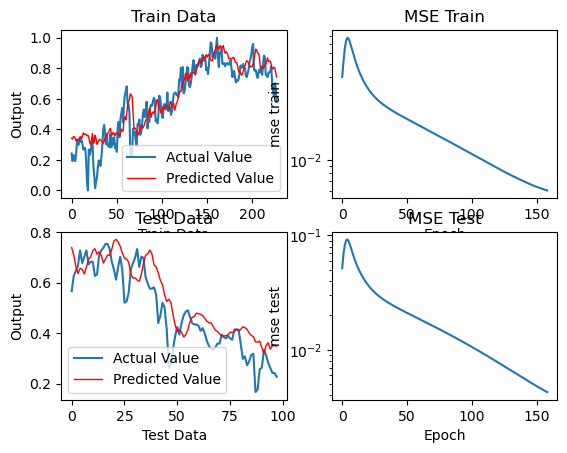

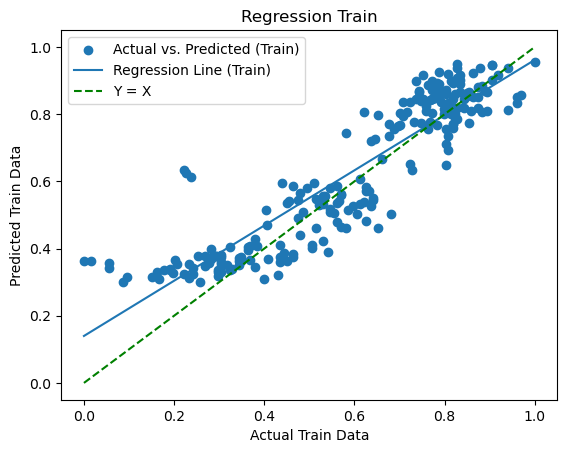

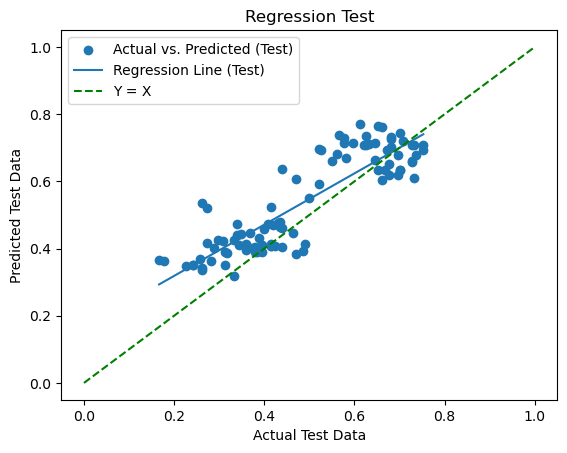

In [387]:
for t in range(epoch):
    error = np.zeros(num_train)
    r = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1/ (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3 # 1 * 1
        target = data[i, 5]
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

        # active function
        #t1 = o2 * (1 - o2) # 20 * 1
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        A = np.diag(t1) #20 * 20


        #t2 = o1 * (1 - o1) # 100 * 1
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        B = np.diag(t2) # 100 * 100

        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)                            #20*20


        pw1     = (k1 +k2) * -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2     = (k1 +k2) * -1 * np.dot(w3, A).T * o1.T                              # 20 * 100
        pw3     = (k1 +k2) * -1 * 1 * o2.T                                            # 1 * 20
        pbi1    = (k1 +k2) * -1 * np.dot(np.dot(w3, A),np.dot(w2,B))                  #100*1
        pbi2    = (k1 +k2) * -1 * np.dot(w3, A)                                       #20*1
        pbi3    = (k1 +k2) * -1                                                       #1*1
        palpha1 = (k1 +k2) * -1 * np.dot(np.dot(w3, A), np.dot(w2, C))                #100*1
        palpha2 = (k1 +k2) * -1 * np.dot(w3, D)                                       #1*20

        a = pw1.ravel()      # 1 * 500
        b = pw2.ravel()      # 1 * 2000
        c = pw3.ravel()      # 1 * 20
        d = pbi1.ravel()     # 1 * 100
        e = pbi2.ravel()     # 1 * 20
        f = np.array([pbi3]) # 1 * 1
        g = palpha1.ravel()  # 1 * 100
        h = palpha2.ravel()  # 1 * 20

        w_par[i, :] = np.concatenate((a, b, c, d, e, f, g, h))

    a1 = w1.ravel() # 1 * 300
    b1 = w2.ravel() # 1 * 2000
    c1 = w3.ravel() # 1 * 20
    d1 = bi1.ravel()
    e1 = bi2.ravel()
    f1 = bi3.ravel()
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data)
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1)
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2)
        o3 = net3
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data)
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1)
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2)
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2

    mse_test[t] = np.mean(error_square_test)
    
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()
      

**Tehran Stock Exchange-index of 30 big company dataset**

In [254]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/Tehran Stock Exchange-index of 30 big company.xlsx")
data_Teh = df.to_numpy()

**preparing dataset**

In [257]:
data = data_Teh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = data[:, ii] / np.max(data[:, ii])
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_12436\3020261046.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_12436\3020261046.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**initialize Conentional MLP**

In [260]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 30, 20, 1
eta = 0.7
epoch = 30

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)


**impelemention Convetional MLP**

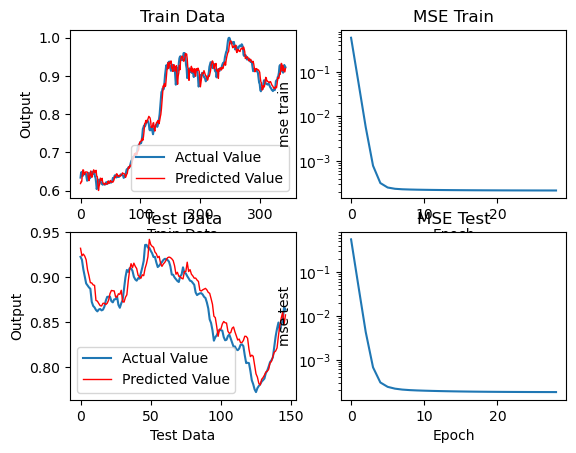

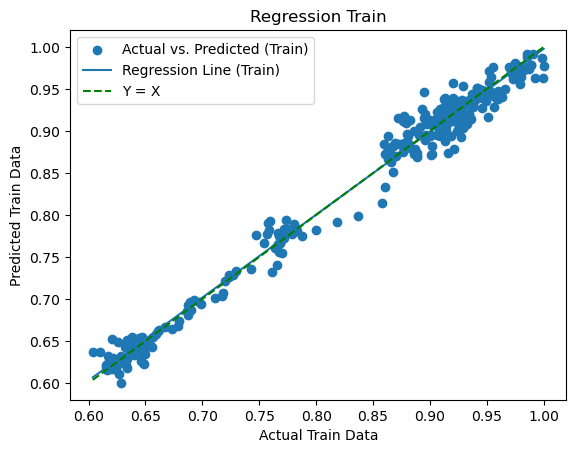

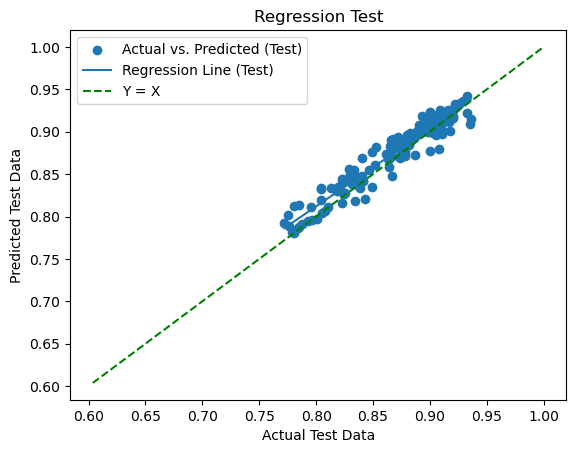

In [192]:
for t in range(epoch):
    error = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3                             # 1 * 1
        target = data[i, 5]
        error[i] = target - o3

        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100

        pw1 = -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2 = -1 * np.dot(w3, A).T * o1.T # 20 * 100
        pw3 = -1 * 1 * o2.T   # 1 * 20
        pbi1 = -1 * np.dot(np.dot(w3, A),np.dot(w2,B))
        pbi2 = -1 * np.dot(w3, A)
        pbi3 = -1

        a = pw1.ravel() # 1 * 300
        b = pw2.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        d = pbi1.ravel()
        e = pbi2.ravel()
        f = np.array([pbi3])

        w_par[i, :] = np.concatenate((a, b, c, d, e, f))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[i, 5]
        output_data_train[i] = o3
        error_square_train[i] = (target - o3) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error_square_test[i] = (target - o3) ** 2

    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**initialize Emotional MLP**

In [199]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 30, 20, 1
eta = 0.7
epoch = 40

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4
# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b, n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

**implemention Emotional MLp**

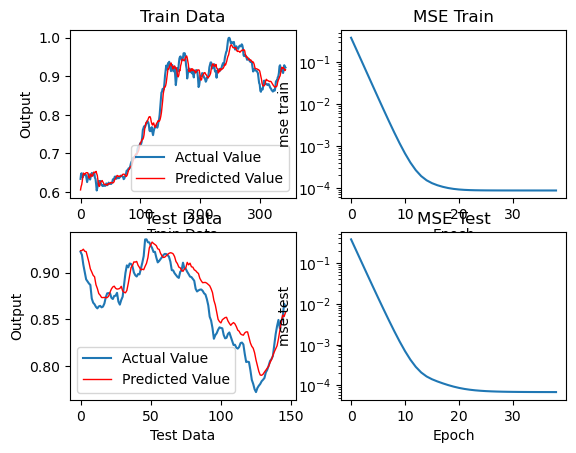

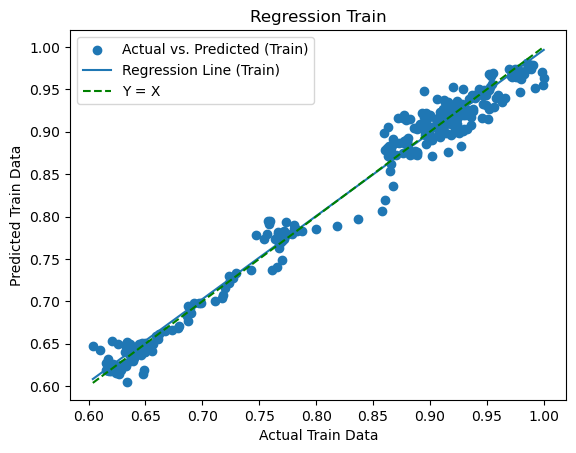

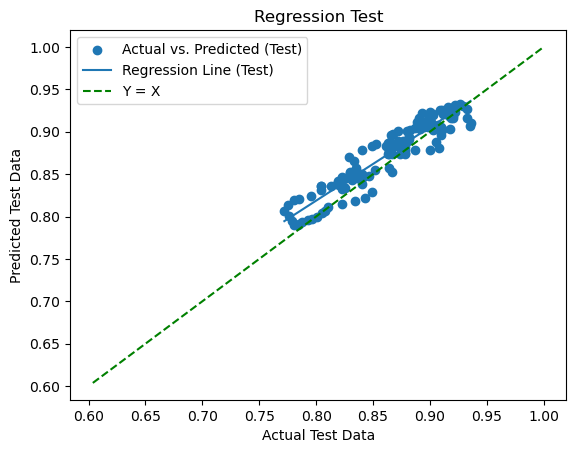

In [202]:
for t in range(epoch):
    error = np.zeros(num_train)
    r = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3 # 1 * 1
        target = data[i, 5]
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]

        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        #t1 = (o2/2) * (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20


        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100

        pw1 = (k1 +k2) * -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2 = (k1 +k2) * -1 * np.dot(w3, A).T * o1.T # 20 * 100
        pw3 = (k1 +k2) * -1 * 1 * o2.T   # 1 * 20
        pbi1 = (k1 +k2) * -1 * np.dot(np.dot(w3, A),np.dot(w2,B))
        pbi2 = (k1 +k2) * -1 * np.dot(w3, A)
        pbi3 = (k1 +k2) * -1

        a = pw1.ravel() # 1 * 300
        b = pw2.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        d = pbi1.ravel()
        e = pbi2.ravel()
        f = np.array([pbi3])

        w_par[i, :] = np.concatenate((a, b, c, d, e, f))

    a1 = w1.ravel() # 1 * 300
    b1 = w2.ravel() # 1 * 2000
    c1 = w3.ravel() # 1 * 20
    d1 = bi1.ravel()
    e1 = bi2.ravel()
    f1 = bi3.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error[i] = target - o3
        r[i] = (k1+k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2

    mse_test[t] = np.mean(error_square_test)
    
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()




**initialize Flexible MLP**

In [244]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 30, 20, 1
eta = 0.7
epoch = 100

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
palpha1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
palpha2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

**impelemention Flexible MLP**

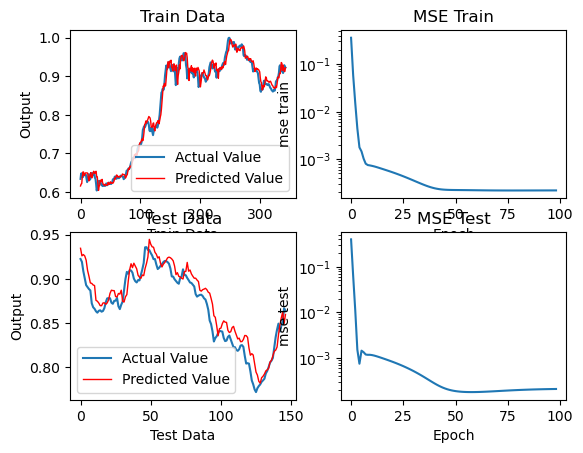

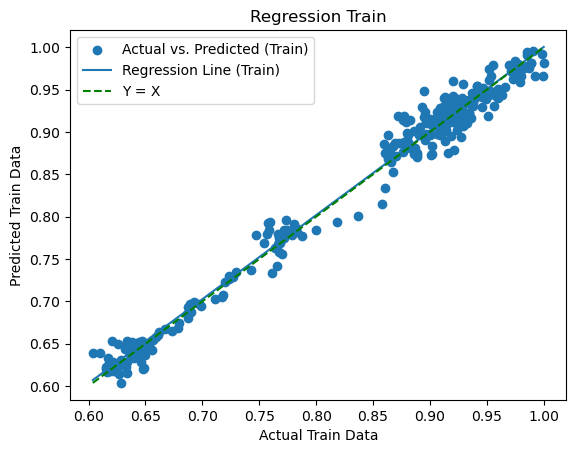

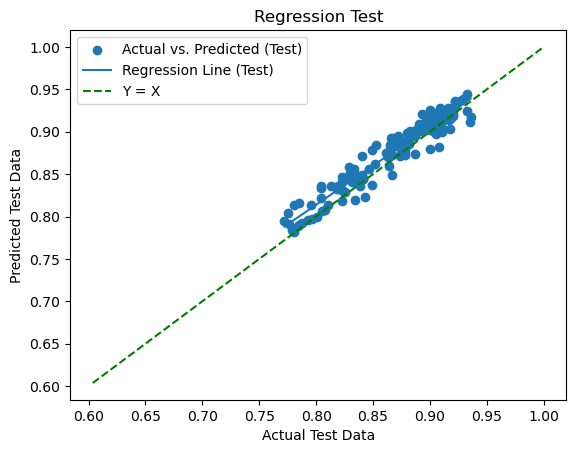

In [247]:
for t in range(epoch):
    error = np.zeros(num_train)

    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1/ (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3 # 1 * 1
        target = data[i, 5]
        error[i] = target - o3

        # active function
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        A = np.diag(t1) #20 * 20


        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        B = np.diag(t2) # 100 * 100

        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)                            #20*20


        pw1     = -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2     = -1 * np.dot(w3, A).T * o1.T                              # 20 * 100
        pw3     = -1 * 1 * o2.T                                            # 1 * 20
        pbi1    = -1 * np.dot(np.dot(w3, A),np.dot(w2,B))                  #100*1
        pbi2    = -1 * np.dot(w3, A)                                       #20*1
        pbi3    =  -1                                                       #1*1
        palpha1 = -1 * np.dot(np.dot(w3, A), np.dot(w2, C))                #100*1
        palpha2 = -1 * np.dot(w3, D)                                       #1*20

        a = pw1.ravel()      # 1 * 500
        b = pw2.ravel()      # 1 * 2000
        c = pw3.ravel()      # 1 * 20
        d = pbi1.ravel()     # 1 * 100
        e = pbi2.ravel()     # 1 * 20
        f = np.array([pbi3]) # 1 * 1
        g = palpha1.ravel()  # 1 * 100
        h = palpha2.ravel()  # 1 * 20

        w_par[i, :] = np.concatenate((a, b, c, d, e, f, g, h))

    a1 = w1.ravel() # 1 * 300
    b1 = w2.ravel() # 1 * 2000
    c1 = w3.ravel() # 1 * 20
    d1 = bi1.ravel()
    e1 = bi2.ravel()
    f1 = bi3.ravel()
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 + n3 + n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 + n3 + n4 + n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2)
        o3 = net3 + bi3
        target = data[i, 5]
        output_data_train[i] = o3
        error_square_train[i] = (target - o3) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error_square_test[i] = (target - o3) ** 2

    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize Emotional and Flexible MLP**

In [317]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1, n2, n3, n4 = 5, 120, 30, 1
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.8
epoch = 80

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4
# W_per is Jakubian Matrix
w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)


#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
palpha1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
palpha2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

4531


**Implemention Flexible and Emotional MLP**

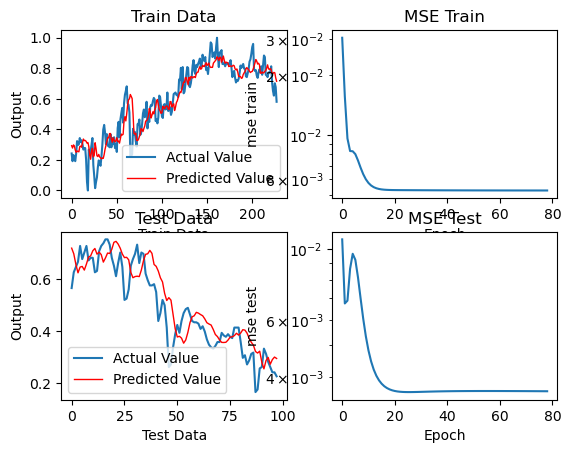

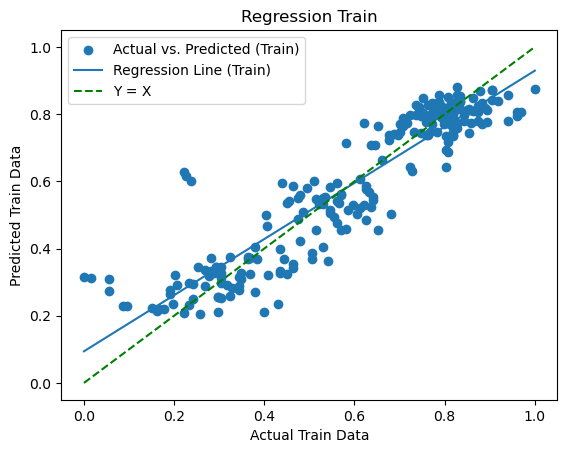

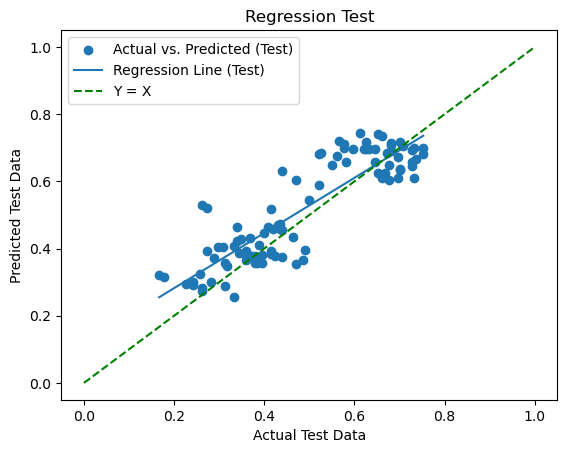

In [320]:
for t in range(epoch):
    error = np.zeros(num_train)
    r = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]              # 1*3       W1 = 100*3, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1/ (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 1 * 1
        o3 = net3 # 1 * 1
        target = data[i, 5]
        error[i] = target - o3
        r[i] = (k1 + k2)*error[i] - k2*error[i-1]


        # active function
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        A = np.diag(t1) #20 * 20


        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        B = np.diag(t2) # 100 * 100

        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)                            #20*20


        pw1     = -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data # 100 * 3
        pw2     = -1 * np.dot(w3, A).T * o1.T                              # 20 * 100
        pw3     = -1 * 1 * o2.T                                            # 1 * 20
        pbi1    = -1 * np.dot(np.dot(w3, A),np.dot(w2,B))                  #100*1
        pbi2    = -1 * np.dot(w3, A)                                       #20*1
        pbi3    = -1                                                       #1*1
        palpha1 = -1 * np.dot(np.dot(w3, A), np.dot(w2, C))                #100*1
        palpha2 = -1 * np.dot(w3, D)                                       #1*20

        a = pw1.ravel()      # 1 * 500
        b = pw2.ravel()      # 1 * 2000
        c = pw3.ravel()      # 1 * 20
        d = pbi1.ravel()     # 1 * 100
        e = pbi2.ravel()     # 1 * 20
        f = np.array([pbi3]) # 1 * 1
        g = palpha1.ravel()  # 1 * 100
        h = palpha2.ravel()  # 1 * 20

        w_par[i, :] = np.concatenate((a, b, c, d, e, f, g, h))

    a1 = w1.ravel() # 1 * 300
    b1 = w2.ravel() # 1 * 2000
    c1 = w3.ravel() # 1 * 20
    d1 = bi1.ravel()
    e1 = bi2.ravel()
    f1 = bi3.ravel()
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 + n3 + n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 + n3 + n4 + n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2)
        o3 = net3 + bi3
        target = data[i, 5]
        output_data_train[i] = o3
        error[i] = target - o3
        r[i] = (k1 + k2)*error[i] - k2*error[i-1]
        error_square_train[i] = (r[i]) ** 2

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = net3
        target = data[num_train + i, 5]
        output_data_test[i] = o3
        error[i] = target - o3
        r[i] = (k1 + k2)*error[i] - k2*error[i-1]
        error_square_test[i] = (r[i]) ** 2


    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**Classification**

**classification-parkinsons Dataset**

In [1]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/classification-parkinsons.xlsx")
data_park = df.to_numpy()

In [2]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)

data = data_park
data1 = data[:,1:17]
data2 = data[:, 18:]

input = np.concatenate((data1,data2),axis=1).astype('float32')
output = data[:, 17]

f = input.shape[1]

def normalizeData(input):
  for ii in range(f):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii])-np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_park)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**convetional MLP**

In [91]:
n1, n2, n3, n4 = input.shape[1], 100, 40,2
eta = 1.1
epoch = 70

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4*n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4,n3))
pw31 = np.zeros((n4,n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

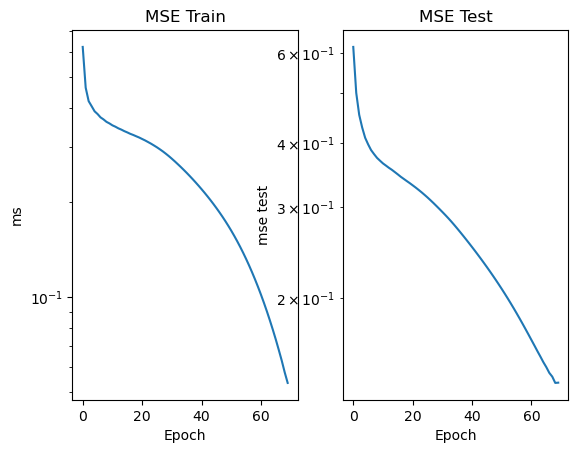

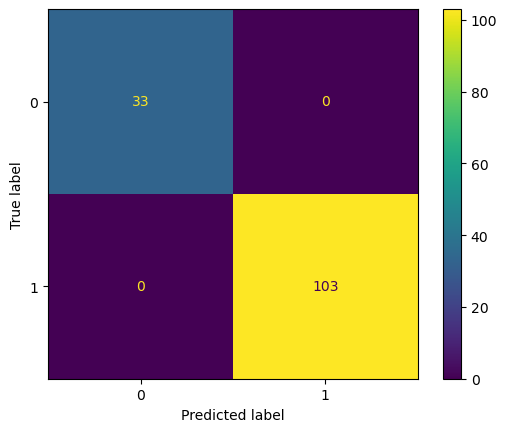

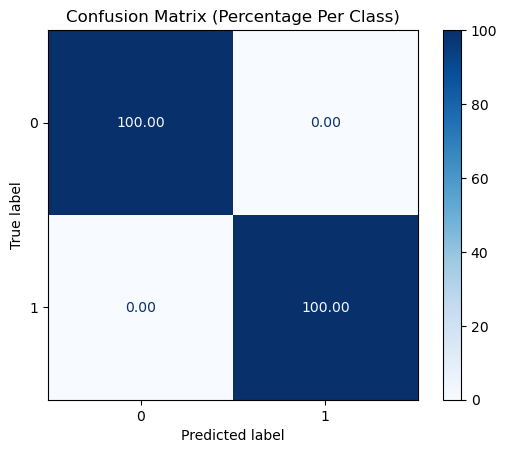

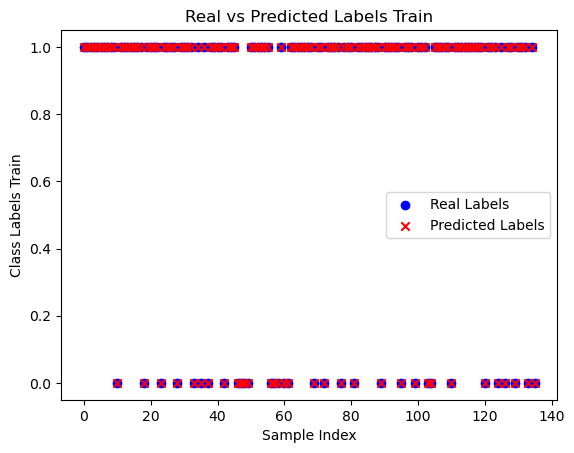

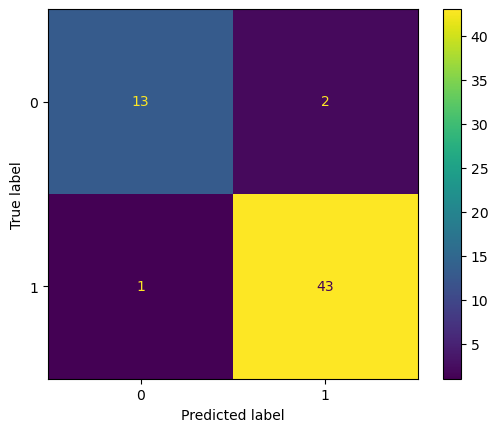

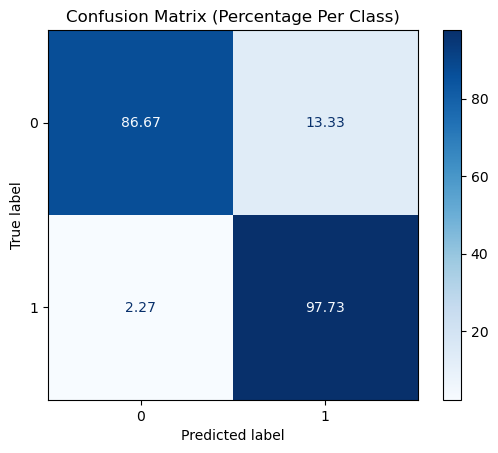

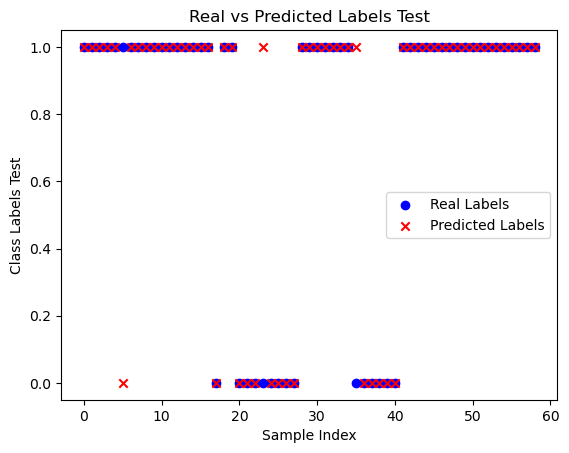

In [93]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    e = np.zeros(2)
    for i in range(num_train):
        input_data = input_train[i, :]         # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1  # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))           # 100 * 1
        net2 = np.dot(w2, o1) + bi2            # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))           # 20 * 1
        net3 = np.dot(w3, o2) + bi3            # 2 * 1
        o3 = softmax(net3)                     # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]
        # active function
        t1 =(2*np.exp(-net2))/((1+np.exp(-net2))**2) 
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2) 
        B = np.diag(t2) # 100 * 100#

        pw1      = -1*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11     = -1*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2      = -1*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21     = -1*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:] = -1*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(target[1] - o3[1])*o2
        pbi1     = -1*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11    = -1*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2     = -1*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21    = -1*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0]  = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])

        a  = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b  = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c  = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d  = pbi1.ravel()
        d0 = pbi11.ravel()
        e  = pbi2.ravel()
        e0 = pbi21.ravel()
        f  = pbi3.ravel()
        f0 = pbi31.ravel()
        

        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1


    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    #error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    e_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))

    mse_train[t] = np.mean(e_train)

    #error_square_test = np.zeros(num_test)
    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        #error_square_test[i] = (error[i])**2

    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()


**initialize Emotional**

In [119]:
n1, n2, n3, n4 = input.shape[1], 100, 40, 2
eta = 1.1
epoch = 80

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4*n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4,n3))
pw31 = np.zeros((n4,n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention Emotional**

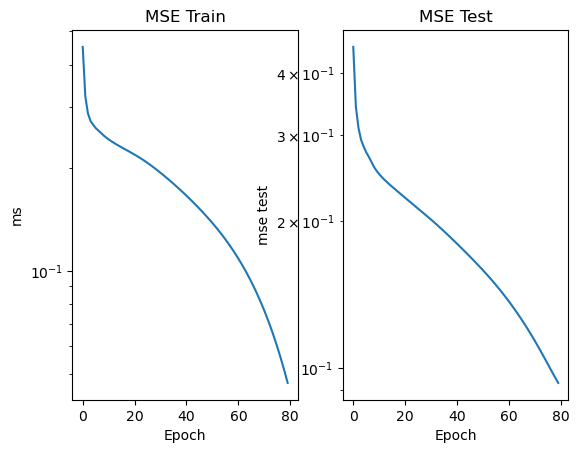

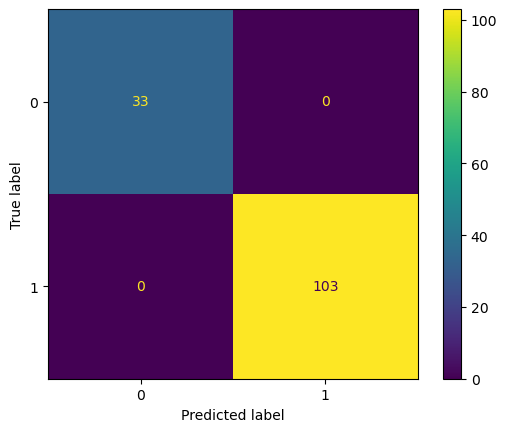

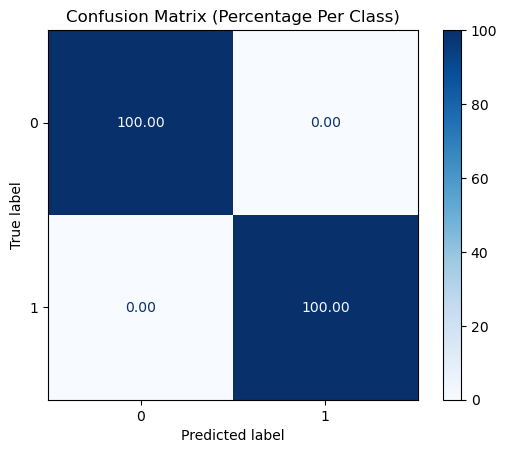

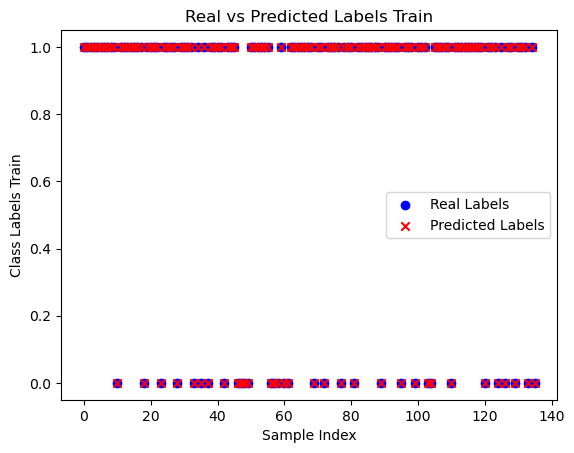

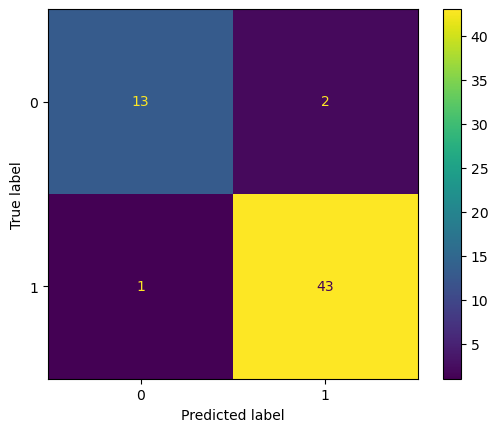

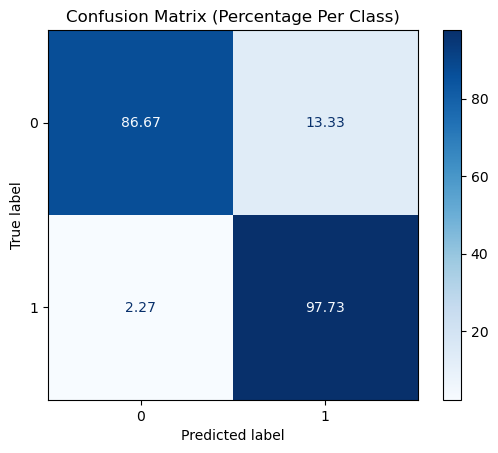

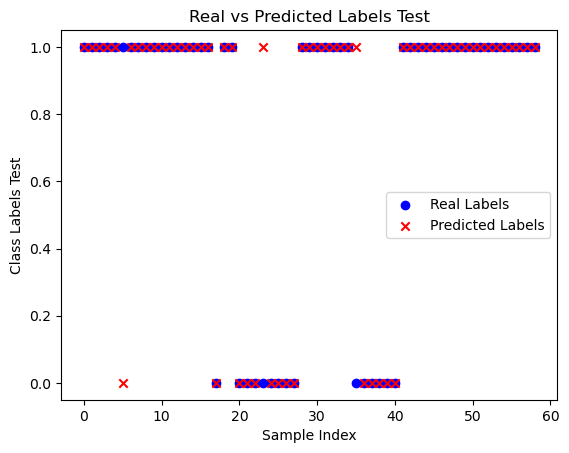

In [122]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    r = np.zeros(2*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]         # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1  # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))           # 100 * 1
        net2 = np.dot(w2, o1) + bi2            # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))           # 20 * 1
        net3 = np.dot(w3, o2) + bi3            # 2 * 1
        o3 = softmax(net3)                     # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]
        r[2*i] = (k1+k2)*error[2*i] - k2*error[2*i-2]
        r[2*i+1] = (k1+k2)*error[2*i+1] - k2*error[2*i-1]
        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        B = np.diag(t2) # 100 * 100

        pw1 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:] = -1*(k1+k2)*(target[0] - o3[0])*o2  
        pw31[1,:] = -1*(k1+k2)*(target[1] - o3[1])*o2
        pbi1 = -1*(k1+k2)*(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1 * (k1+k2)*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1 * (k1+k2)*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1 * (k1+k2)*(target[0] - o3[0])
        pbi31[1] = -1 * (k1+k2)*(target[1] - o3[1])

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        

        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1


    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1*(np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T,r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    #error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    e_train = np.zeros(num_train)
    r = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_train[i] - k2*e_train[i-1]

    mse_train[t] = np.mean(r)

    #error_square_test = np.zeros(num_test)
    e_test = np.zeros(num_test)
    r = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_test[i] - k2*e_test[i-1]

    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Flexible MLP**

In [202]:
n1, n2, n3, n4 = input.shape[1], 100, 40, 2
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 1.1
epoch = 85

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
palpha1 = np.zeros(n2)
palpha11 = np.zeros(n2)
#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
palpha2 = np.zeros(n3)
palpha21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pw31 = np.zeros((n4, n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)

6562


**implemention Flexible MLP**

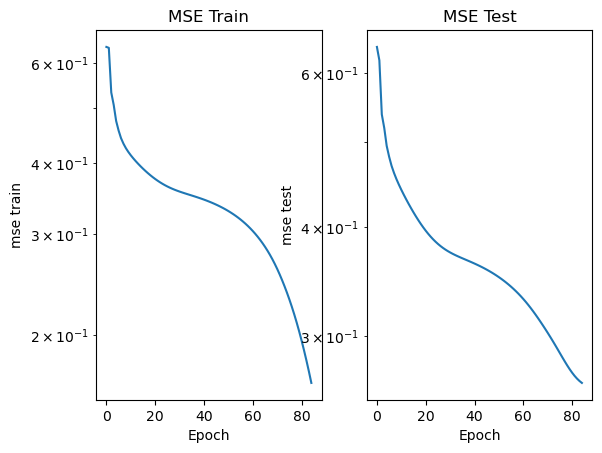

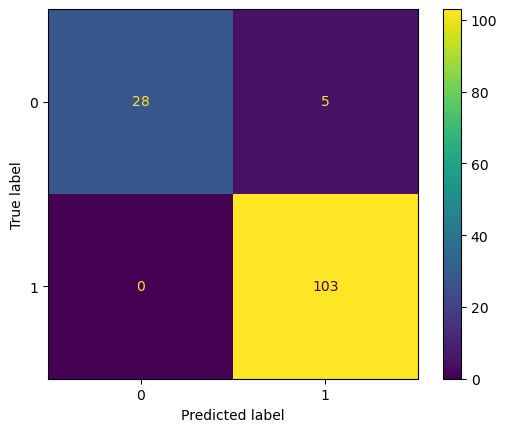

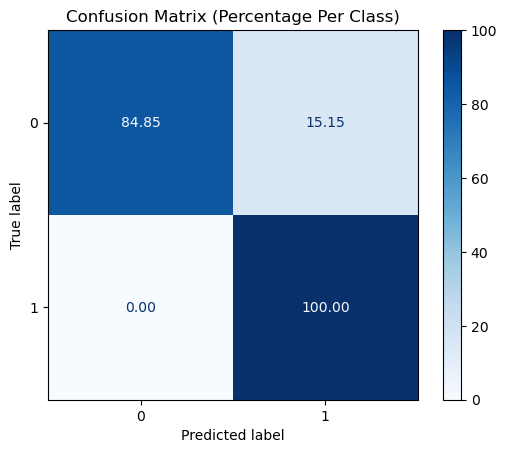

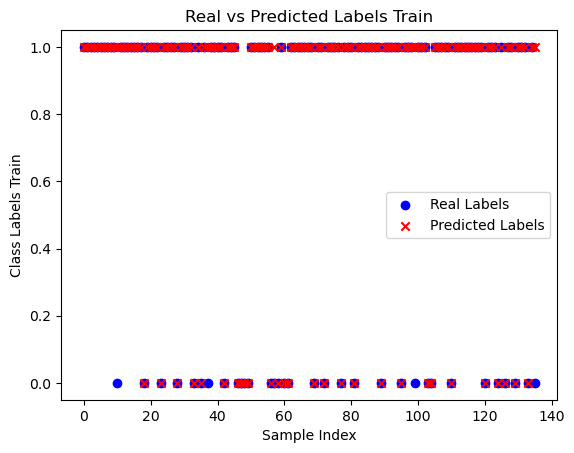

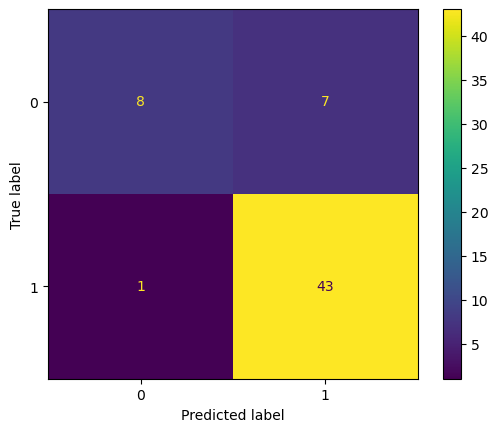

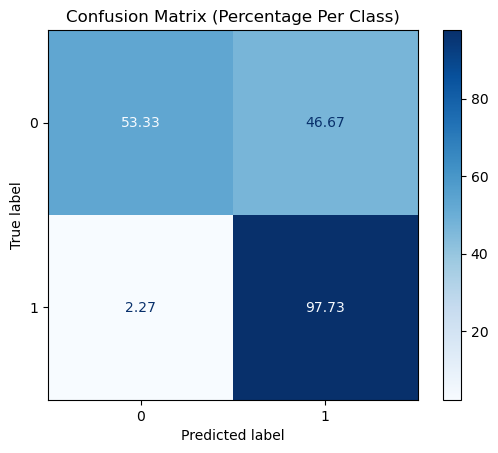

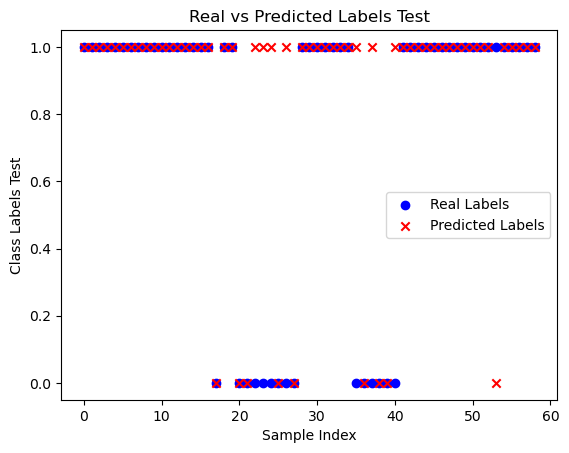

In [205]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = softmax(net3)                    # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]

        # active function fprim
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
    
        A = np.diag(t1) 
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2

        B = np.diag(t2) 
        
        #f star
        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                           

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    
        D = np.diag(ts2)

        
        pw1 = -1*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:]=-1*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(target[1] - o3[1])*o2
        pbi1 = -1*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])
        palpha1 = -1 *(target[0] - o3[0])*np.dot(np.dot(np.dot(w3[0, :],A),w2),C)  #100*1
        palpha11 = -1 *(target[1] - o3[1])*np.dot(np.dot(np.dot(w3[1, :],A),w2),C) #100*1
        palpha2 = -1 *(target[0] - o3[0])*np.dot(w3[0, :], D) 
        palpha21 = -1 *(target[1] - o3[1])*np.dot(w3[1, :], D) 

        a  = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b  = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c  = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d  = pbi1.ravel()
        d0 = pbi11.ravel()
        e  = pbi2.ravel()
        e0 = pbi21.ravel()
        f  = pbi3.ravel()
        f0 = pbi31.ravel()
        g  = palpha1.ravel()  # 1 * 100
        g0 = palpha11.ravel()
        h  = palpha2.ravel()
        h0 = palpha21.ravel()
        
        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f,g ,h))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0, g0, h0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    e_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))

    mse_train[t] = np.mean(e_train)

    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        
    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Emotional and Flexible**

In [26]:
n1, n2, n3, n4 = input.shape[1], 100, 50, 2
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.8
epoch = 135

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.4, 0.6

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
palpha1 = np.zeros(n2)
palpha11 = np.zeros(n2)
#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
palpha2 = np.zeros(n3)
palpha21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pw31 = np.zeros((n4, n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)
def softmax(a):
  e = np.exp(a)
  return e/e.sum()

7602


**implemention Emotional and Flexible MLP**

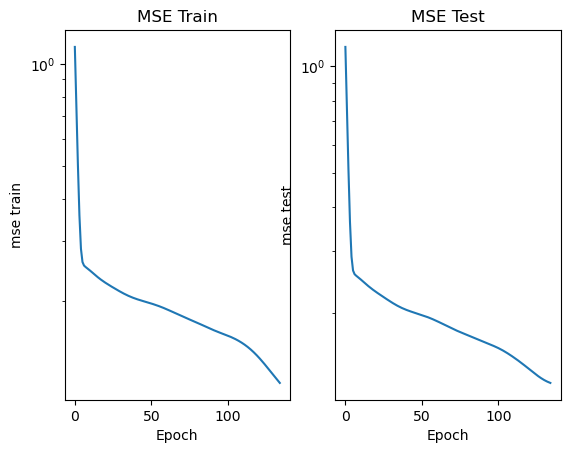

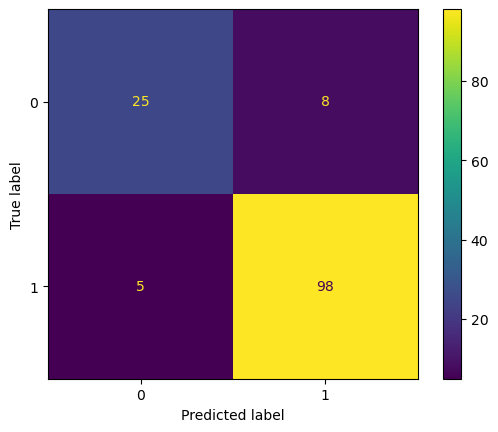

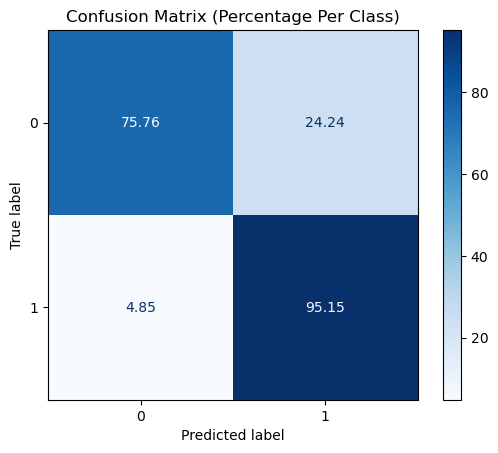

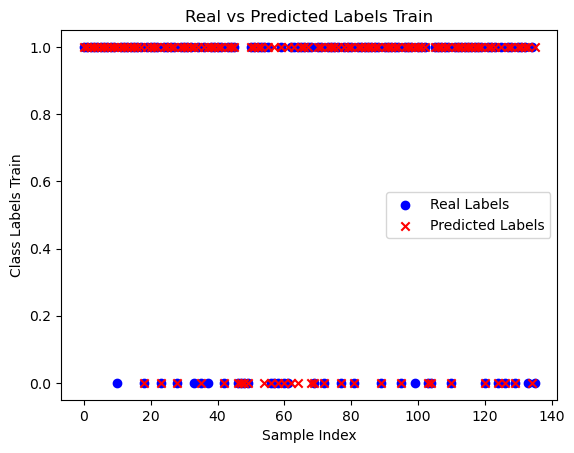

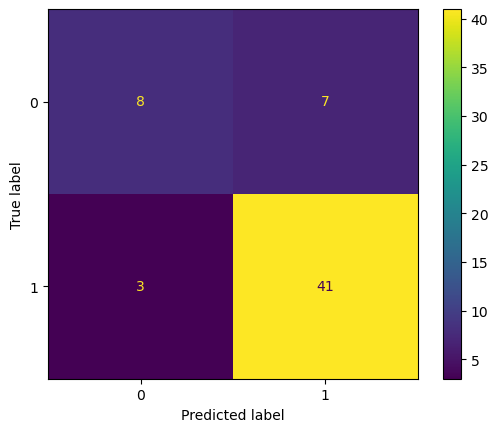

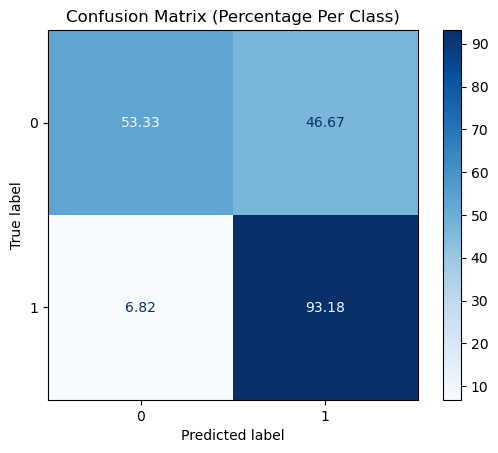

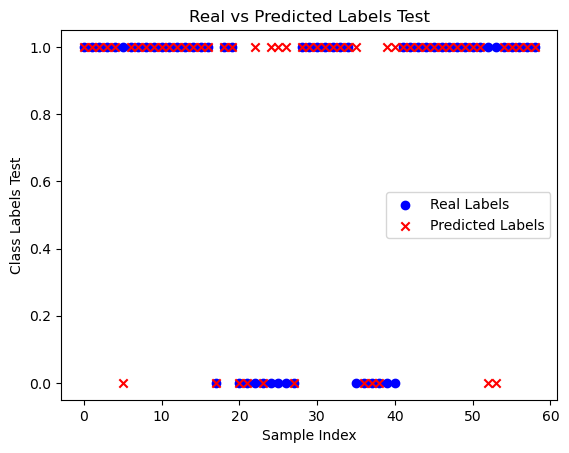

In [29]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    r = np.zeros(2*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = softmax(net3)                    # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]
        r[2*i] = (k1+k2)*error[2*i] - k2*error[2*i-2]
        r[2*i+1] = (k1+k2)*error[2*i+1] - k2*error[2*i-1]

        # active function fprim
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100
        
        #f star
        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)

        
        pw1 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:]=-1*(k1+k2)*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(k1+k2)*(target[1] - o3[1])*o2
        pbi1 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1*(k1+k2)*(target[0] - o3[0])
        pbi31[1] = -1*(k1+k2)*(target[1] - o3[1])
        palpha1 = -1 *(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(np.dot(w3[0, :],A),w2),C)  #100*1
        palpha11 = -1 *(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(np.dot(w3[1, :],A),w2),C) #100*1
        palpha2 = -1 *(k1+k2)*(target[0] - o3[0])*np.dot(w3[0, :], D) 
        palpha21 = -1 *(k1+k2)*(target[1] - o3[1])*np.dot(w3[1, :], D) 

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        g = palpha1.ravel()  # 1 * 100
        g0 = palpha11.ravel()
        h = palpha2.ravel()
        h0 = palpha21.ravel()
        
        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f,g ,h))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0, g0, h0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    e_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    r = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_train[i] - k2*e_train[i-1]

    mse_train[t] = np.mean(r)

    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    r = np.zeros(num_test)
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_test[i] - k2*e_test[i-1]
        
    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**Breast Dataset**

In [31]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/classification_breast-cancer-wisconsin.xlsx")
data_B = df.to_numpy()

In [33]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)
data = data_B

input = data[:, :9]
output = data[:, 9]
output =np.array([0 if x ==2 else 1 for x in output])

f = input.shape[1]

def normalizeData(input):
  for ii in range(f):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii])-np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_B)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**initialize Convetional MLP**

In [100]:
n1, n2, n3, n4 = input.shape[1], 100, 40, 2
eta = 1.1
epoch = 70

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4*n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4,n3))
pw31 = np.zeros((n4,n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention Convetional MLP**

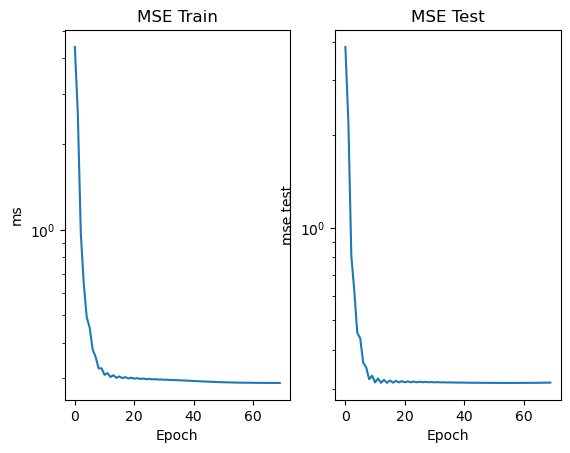

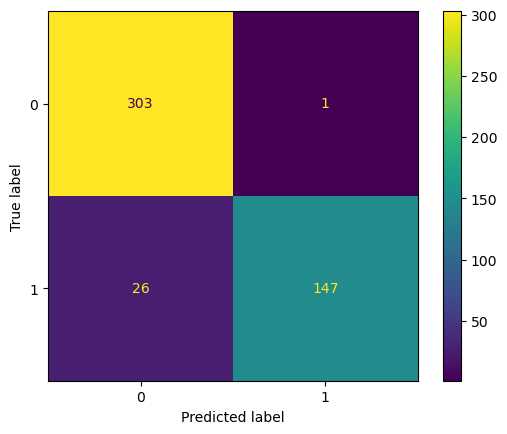

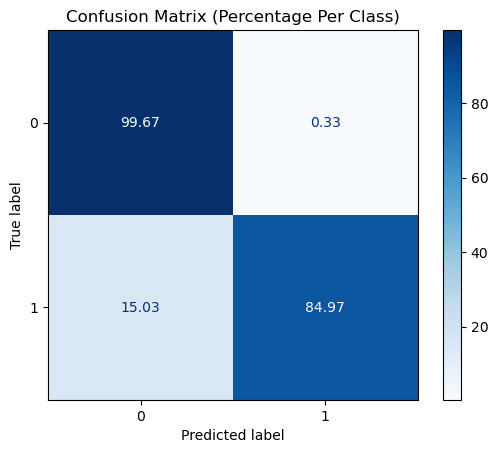

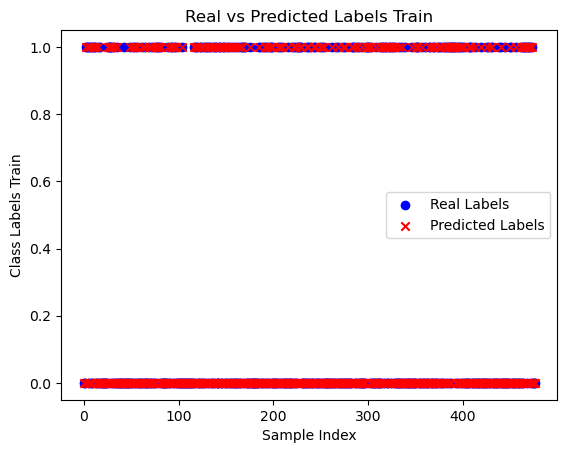

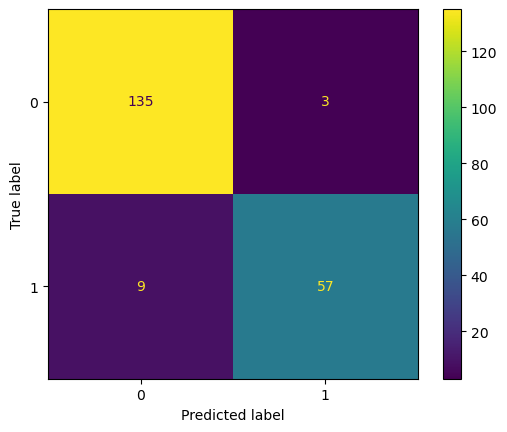

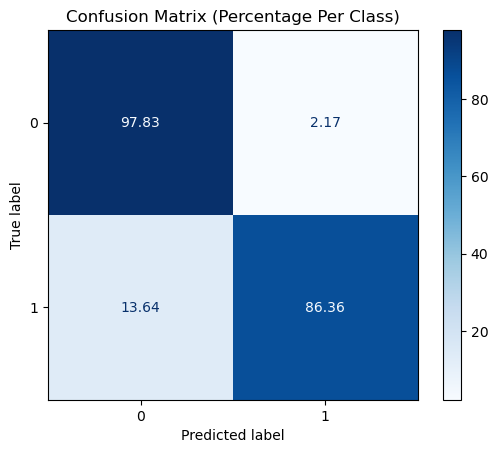

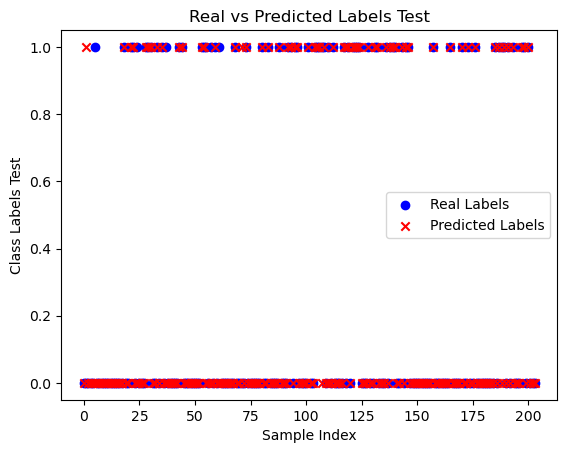

In [103]:
for t in range(epoch):
    error = np.zeros(2*num_train)

    for i in range(num_train):
        e = np.zeros(2)
        input_data = input_train[i, :]         # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1  # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))           # 100 * 1
        net2 = np.dot(w2, o1) + bi2            # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))           # 20 * 1
        net3 = np.dot(w3, o2) + bi3            # 2 * 1
        o3 = softmax(net3)                     # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]
        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        B = np.diag(t2) # 100 * 100

        pw1 = -1*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)  
        pw3[0,:]=-1*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(target[1] - o3[1])*o2
        pbi1 = -1*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        

        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1


    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    #error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    e_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))

    mse_train[t] = np.mean(e_train)

    #error_square_test = np.zeros(num_test)
    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        #error_square_test[i] = (error[i])**2

    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Emotional MLP**

In [129]:
n1, n2, n3, n4 = input.shape[1], 100, 40, 2
eta = 0.8
epoch = 70

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.6, 0.4

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)

net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)

net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pbi4 = np.zeros(n4)

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention Emotional MLP**

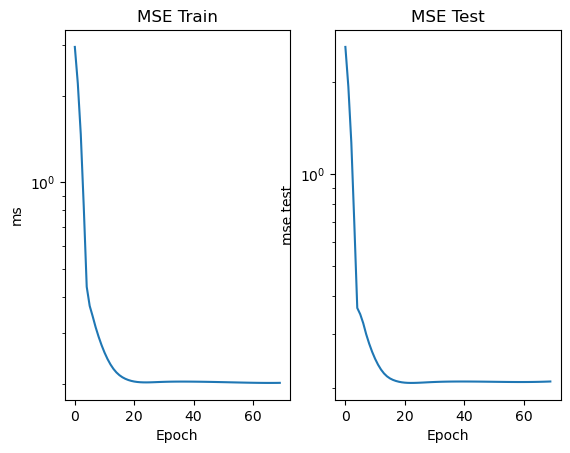

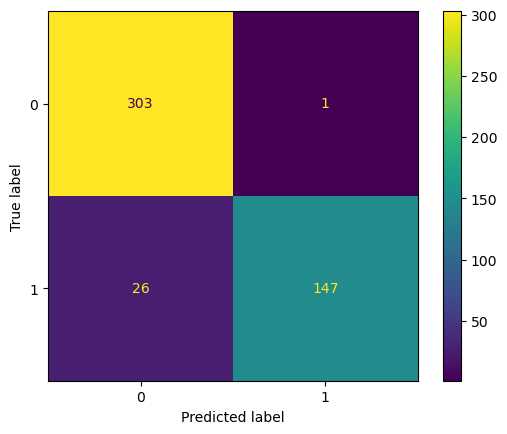

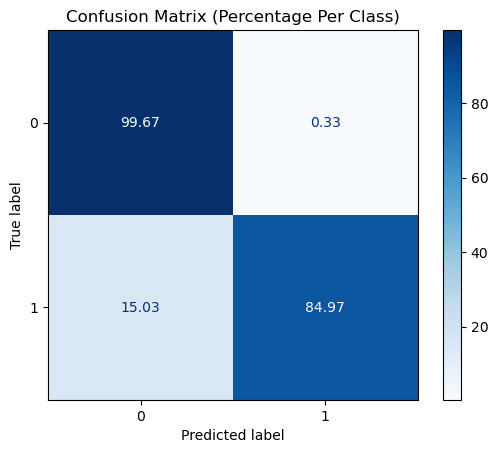

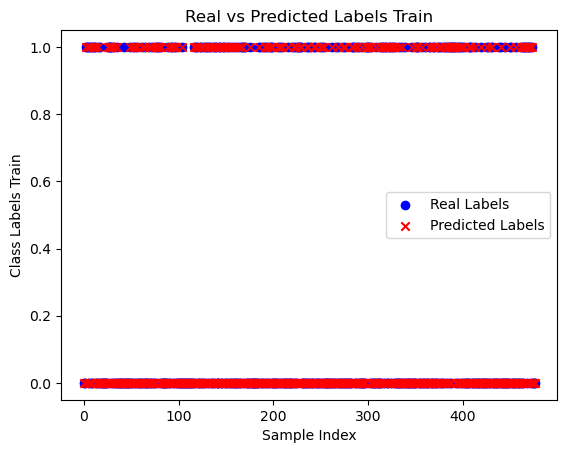

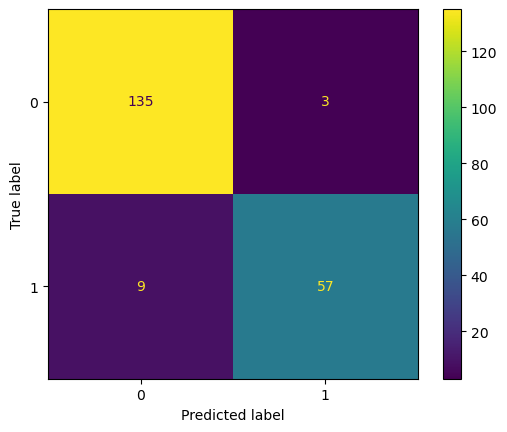

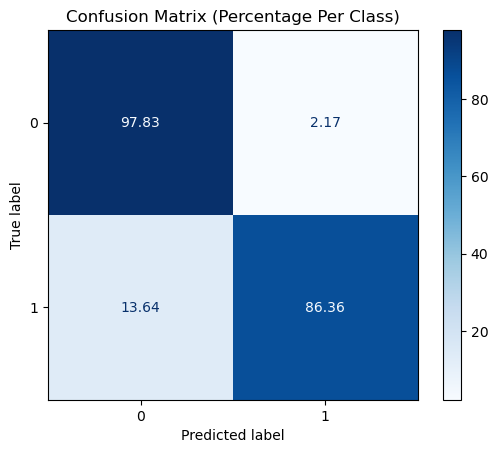

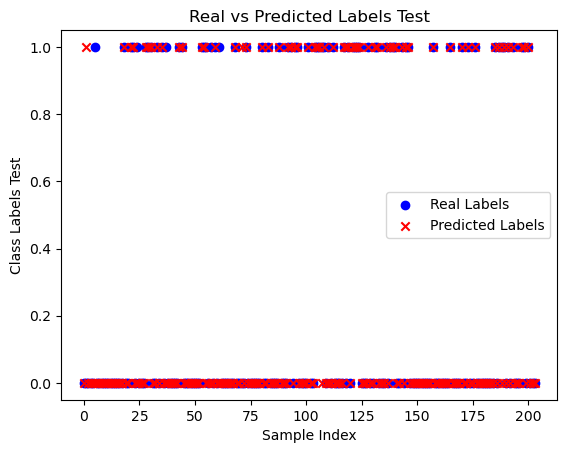

In [132]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    r = np.zeros(2*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]         # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1  # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))           # 100 * 1
        net2 = np.dot(w2, o1) + bi2            # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))           # 20 * 1
        net3 = np.dot(w3, o2) + bi3            # 2 * 1
        o3 = softmax(net3)                     # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]
        r[2*i] = (k1+k2)*error[2*i] - k2*error[2*i-2]
        r[2*i+1] = (k1+k2)*error[2*i+1] - k2*error[2*i-1]
        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        B = np.diag(t2) # 100 * 100

        pw1 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:] = -1*(k1+k2)*(target[0] - o3[0])*o2  
        pw31[1,:] = -1*(k1+k2)*(target[1] - o3[1])*o2
        pbi1 = -1*(k1+k2)*(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1 * (k1+k2)*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1 * (k1+k2)*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1 * (k1+k2)*(target[0] - o3[0])
        pbi31[1] = -1 * (k1+k2)*(target[1] - o3[1])

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        

        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1


    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T,r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    #error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    e_train = np.zeros(num_train)
    r = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_train[i] - k2*e_train[i-1]

    mse_train[t] = np.mean(r)

    #error_square_test = np.zeros(num_test)
    e_test = np.zeros(num_test)
    r = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_test[i] - k2*e_test[i-1]

    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Flexible MLP**

In [12]:
n1, n2, n3, n4 = input.shape[1], 100, 40, 2
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.8
epoch = 70

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
palpha1 = np.zeros(n2)
palpha11 = np.zeros(n2)
#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
palpha2 = np.zeros(n3)
palpha21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pw31 = np.zeros((n4, n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)
def softmax(a):
  e = np.exp(a)
  return e/e.sum()

5262


**implemention Plasticy MLP**

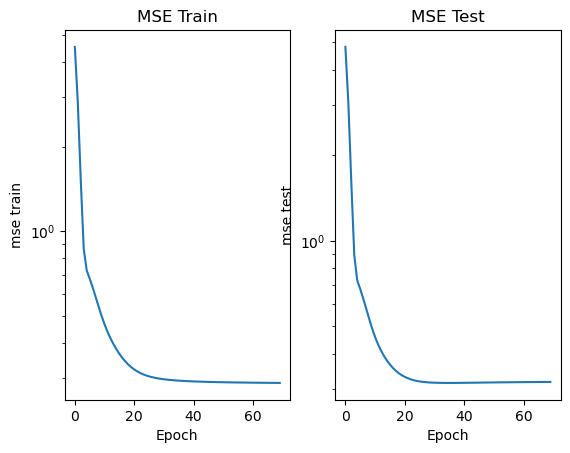

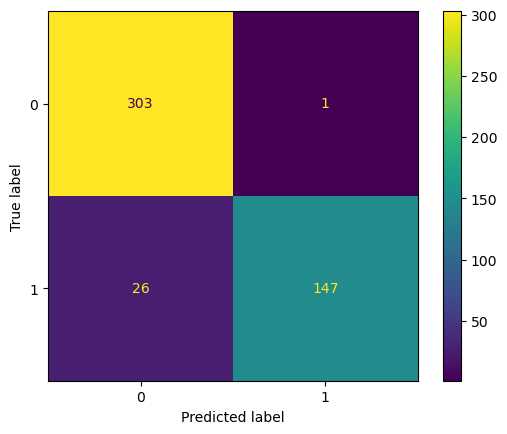

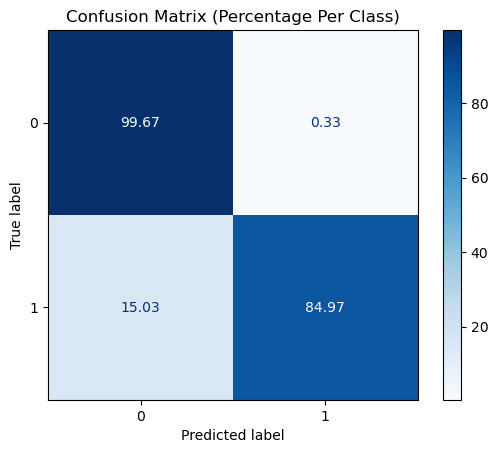

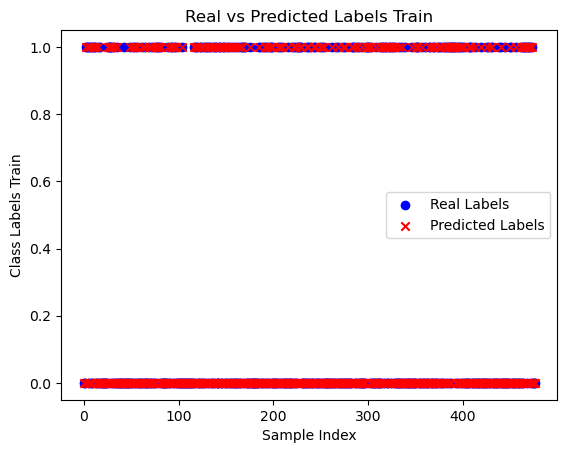

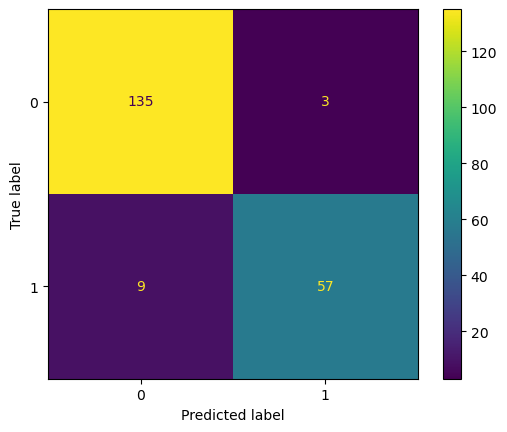

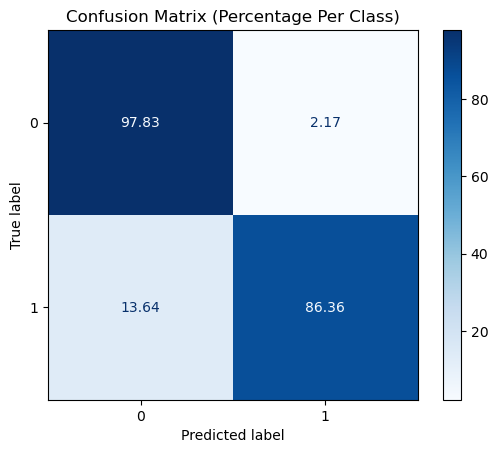

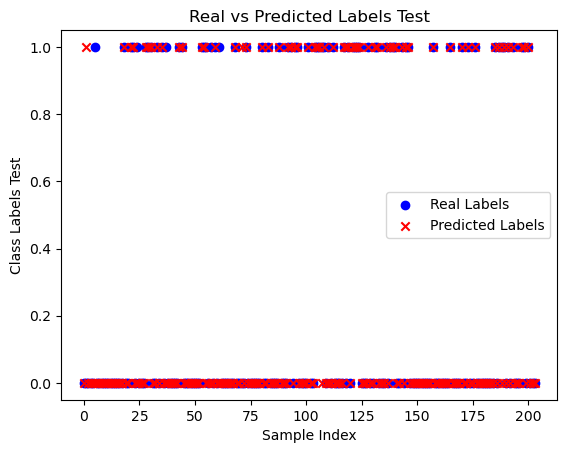

In [15]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = softmax(net3)                    # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]

        # active function fprim
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100
        
        #f star
        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)

        
        pw1 = -1*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:]=-1*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(target[1] - o3[1])*o2
        pbi1 = -1*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])
        palpha1 = -1 *(target[0] - o3[0])*np.dot(np.dot(np.dot(w3[0, :],A),w2),C)  #100*1
        palpha11 = -1 *(target[1] - o3[1])*np.dot(np.dot(np.dot(w3[1, :],A),w2),C) #100*1
        palpha2 = -1 *(target[0] - o3[0])*np.dot(w3[0, :], D) 
        palpha21 = -1 *(target[1] - o3[1])*np.dot(w3[1, :], D) 

        a  = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b  = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c  = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d  = pbi1.ravel()
        d0 = pbi11.ravel()
        e  = pbi2.ravel()
        e0 = pbi21.ravel()
        f  = pbi3.ravel()
        f0 = pbi31.ravel()
        g  = palpha1.ravel()  # 1 * 100
        g0 = palpha11.ravel()
        h  = palpha2.ravel()
        h0 = palpha21.ravel()
        
        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f,g ,h))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0, g0, h0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    e_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))

    mse_train[t] = np.mean(e_train)

    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        
    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Emotional and Flexible MLP**

In [35]:
n1, n2, n3, n4 = input.shape[1], 100, 40, 2
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.7
epoch = 100

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1, k2 = 0.4, 0.6

# W_per is Jakubian Matrix
w_par = np.zeros((2*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)

net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
palpha1 = np.zeros(n2)
palpha11 = np.zeros(n2)
#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
palpha2 = np.zeros(n3)
palpha21 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pw31 = np.zeros((n4, n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)

5262


**implemention Emotional and Flexible MLP**

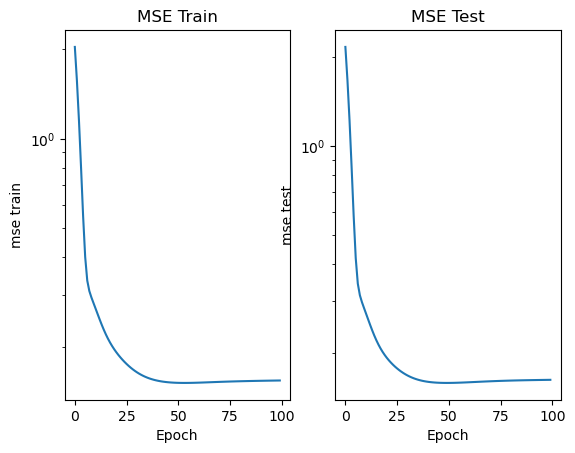

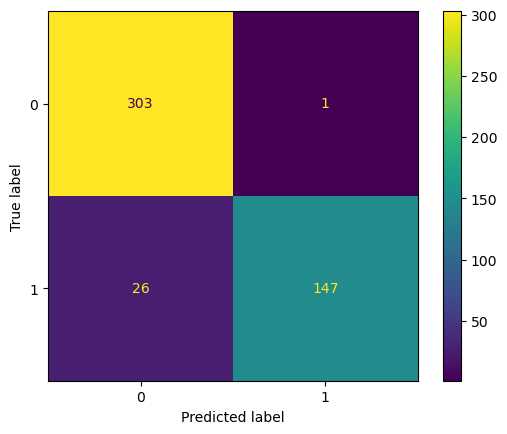

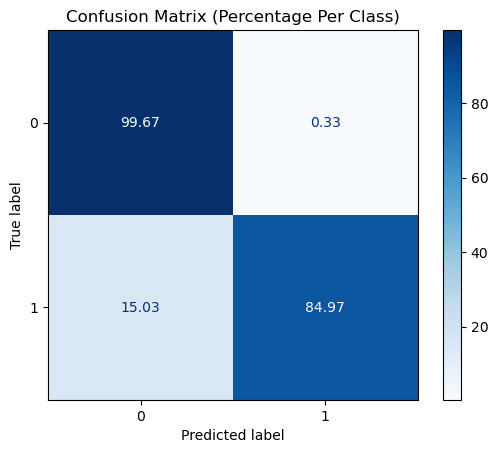

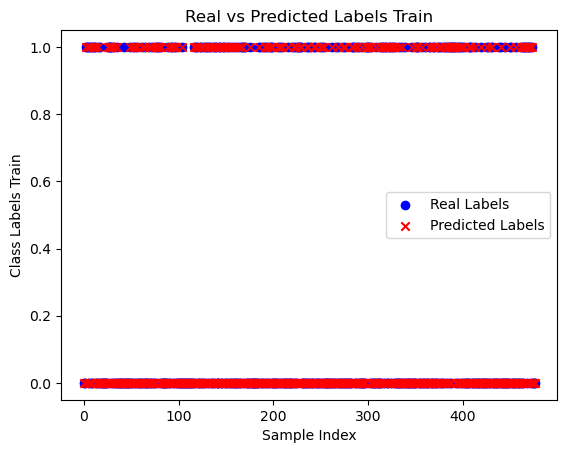

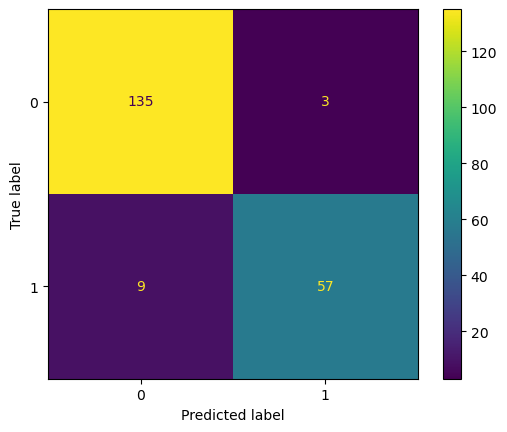

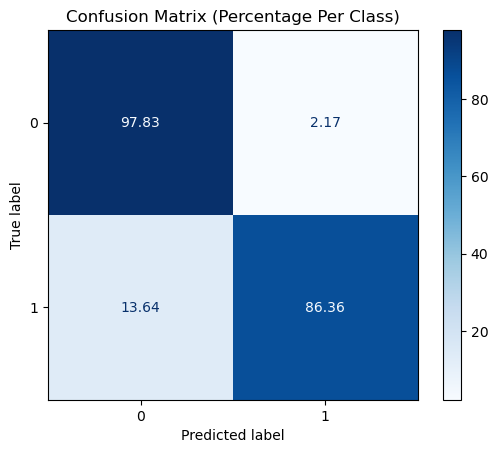

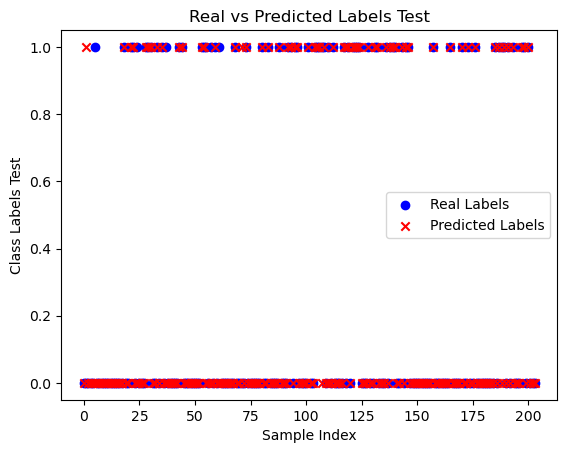

In [38]:
for t in range(epoch):
    error = np.zeros(2*num_train)
    r = np.zeros(2*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = softmax(net3)                    # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[2*i] =e[0]
        error[2*i+1] =e[1]
        r[2*i] = (k1+k2)*error[2*i] - k2*error[2*i-2]
        r[2*i+1] = (k1+k2)*error[2*i+1] - k2*error[2*i-1]

        # active function fprim
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100
        
        #f star
        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)

        
        pw1 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw2 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw3[0,:]=-1*(k1+k2)*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(k1+k2)*(target[1] - o3[1])*o2
        pbi1 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi2 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi3[0] = -1*(k1+k2)*(target[0] - o3[0])
        pbi31[1] = -1*(k1+k2)*(target[1] - o3[1])
        palpha1 = -1 *(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(np.dot(w3[0, :],A),w2),C)  #100*1
        palpha11 = -1 *(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(np.dot(w3[1, :],A),w2),C) #100*1
        palpha2 = -1 *(k1+k2)*(target[0] - o3[0])*np.dot(w3[0, :], D) 
        palpha21 = -1 *(k1+k2)*(target[1] - o3[1])*np.dot(w3[1, :], D) 

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        g = palpha1.ravel()  # 1 * 100
        g0 = palpha11.ravel()
        h = palpha2.ravel()
        h0 = palpha21.ravel()
        
        w_par[2*i, :] = np.concatenate((a, b, c, d, e, f,g ,h))
        w_par[2*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0, g0, h0))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, r))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    e_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,2))
    r = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_train[i] - k2*e_train[i-1]

    mse_train[t] = np.mean(r)

    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 2))
    r = np.zeros(num_test)
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_test[i] - k2*e_test[i-1]
        
    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**Iris Dataset**

In [40]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/classification/classification-iris.xlsx")
data_I = df.to_numpy()

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(42)
data = data_I

input = data_I[:, :4]
output = data_I[:, 4]


def normalizeData(input):
  for ii in range(4):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii])-np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_I)
num_train = round(num_data * 0.7)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected]
output_train = output[selected]

input_test = input[non_selected]
output_test = output[non_selected]


**initialize conventional MLP**

In [68]:
n1, n2, n3, n4 = input.shape[1], 100, 50, 3
eta = 0.8
epoch = 20

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((3*num_train, n2 * n1 + n3 * n2 + n4*n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pw12 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
pbi12 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pw22 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
pbi22 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4,n3))
pw31 = np.zeros((n4,n3))
pw32 = np.zeros((n4,n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)
pbi32 = np.zeros(n4)

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemention conventional MLP**

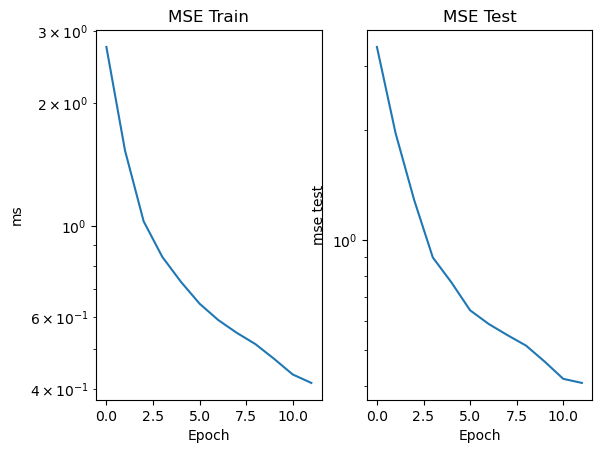

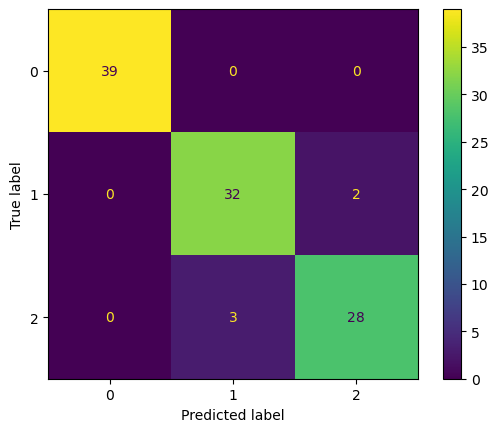

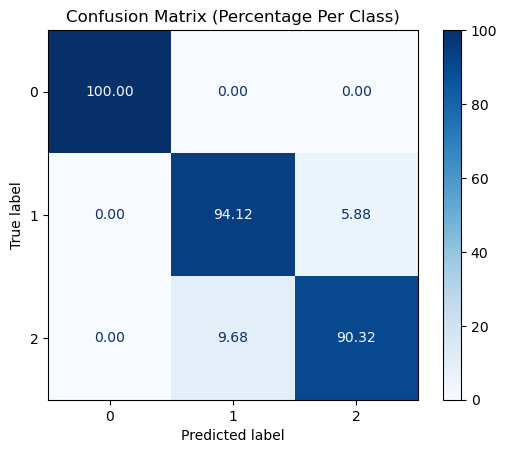

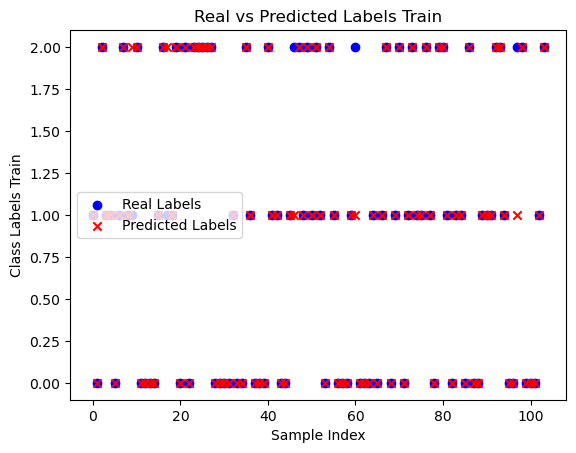

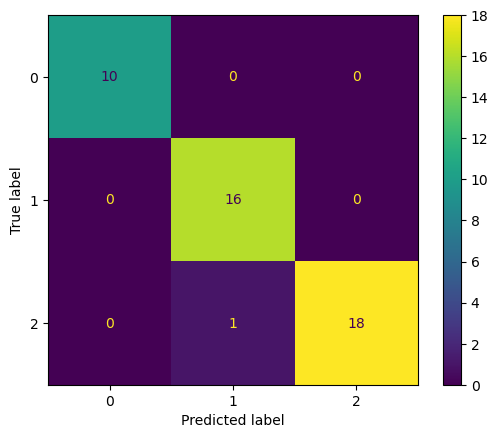

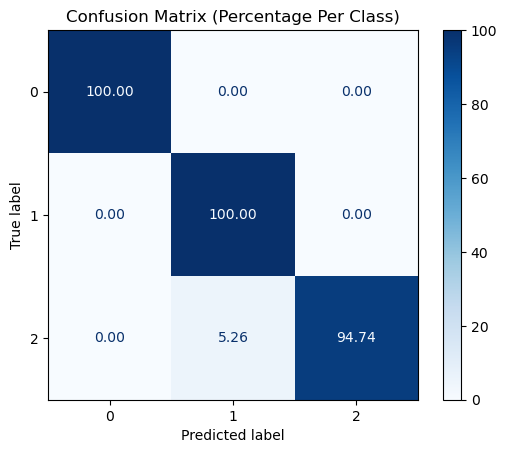

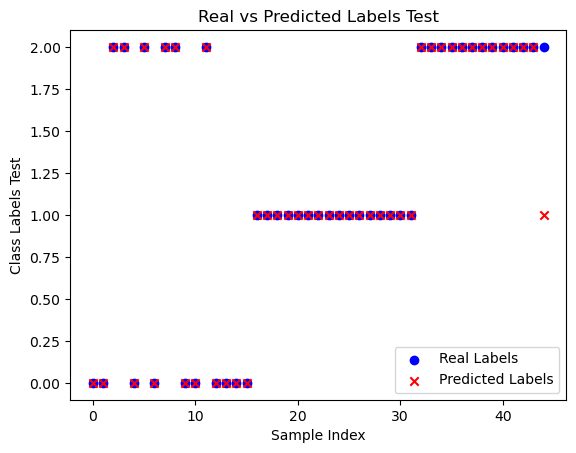

In [71]:
for t in range(epoch):
    error = np.zeros(3*num_train)

    for i in range(num_train):
        e = np.zeros(3)
        input_data = input_train[i, :]         # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1  # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))           # 100 * 1
        net2 = np.dot(w2, o1) + bi2            # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))           # 20 * 1
        net3 = np.dot(w3, o2) + bi3            # 2 * 1
        o3 = softmax(net3)                     # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[3*i] = e[0]
        error[3*i+1] =e[1]
        error[3*i+2] = e[2]
        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        B = np.diag(t2) # 100 * 100

        pw1 = -1*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw12 = -1*(target[2] - o3[2])*np.outer(np.dot(np.dot(w3[2, :], np.dot(A, w2)),B), input_data) 
        
        pw2 = -1*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)  
        pw22 = -1*(target[2] - o3[2])*np.outer(np.dot(w3[2,:], A), o1) 
        
        pw3[0,:]=-1*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(target[1] - o3[1])*o2
        pw31[2,:]= -1*(target[2] - o3[2])*o2
        
        pbi1 = -1*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi12 = -1*(target[2] - o3[2])*np.dot(np.dot(w3[2, :], np.dot(A, w2)),B)
        
        pbi2 = -1*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi22 = -1*(target[2] - o3[2])*np.dot(w3[2,:], A)
        
        pbi3[0] = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])
        pbi32[2] = -1*(target[2] - o3[2])

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        a01 = pw12.ravel()
        
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        b01 = pw22.ravel()
        
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        c01 = pw32.ravel()
        
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        d01 = pbi12.ravel()
        
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        e01 = pbi22.ravel()
        
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        f01 = pbi32.ravel()
        

        w_par[3*i, :] = np.concatenate((a, b, c, d, e, f))
        w_par[3*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0))
        w_par[3*i+2, :] = np.concatenate((a01, b01, c01, d01, e01, f01))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1


    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    #error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,3))
    e_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))

    mse_train[t] = np.mean(e_train)

    #error_square_test = np.zeros(num_test)
    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 3))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        #error_square_test[i] = (error[i])**2

    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Emotional MLP**

In [178]:
n1, n2, n3, n4 = input.shape[1], 100, 50, 3
eta = 0.8
epoch = 20

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1,k2 = 0.6, 0.4

# W_per is Jakubian Matrix
w_par = np.zeros((3*num_train, n2 * n1 + n3 * n2 + n4*n3 + n2 + n3 + n4))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a, b,n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pw12 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
pbi12 = np.zeros(n2)

#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b,n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pw22 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
pbi22 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b,n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4,n3))
pw31 = np.zeros((n4,n3))
pw32 = np.zeros((n4,n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)
pbi32 = np.zeros(n4)

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**implemntion Emotionla MLP**

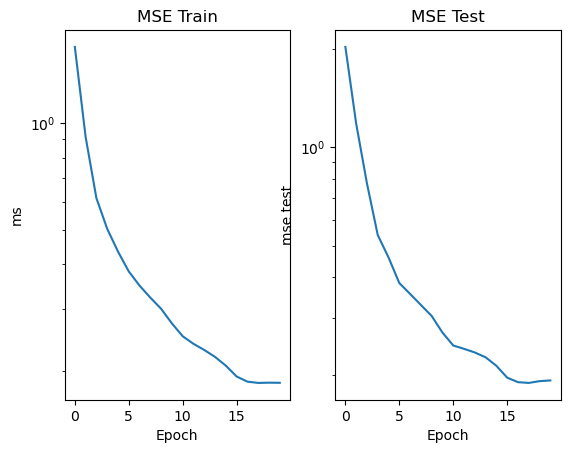

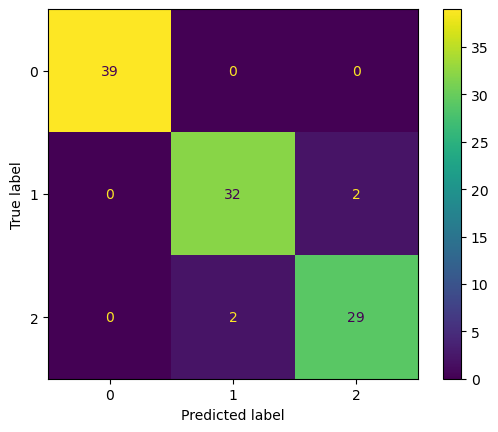

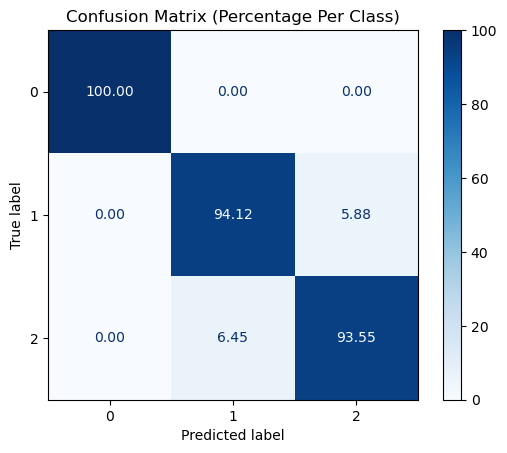

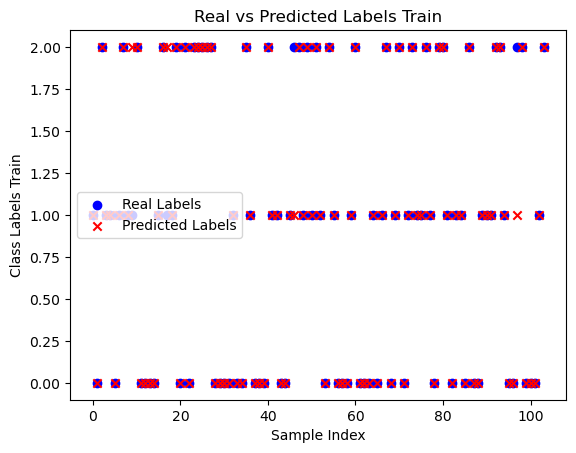

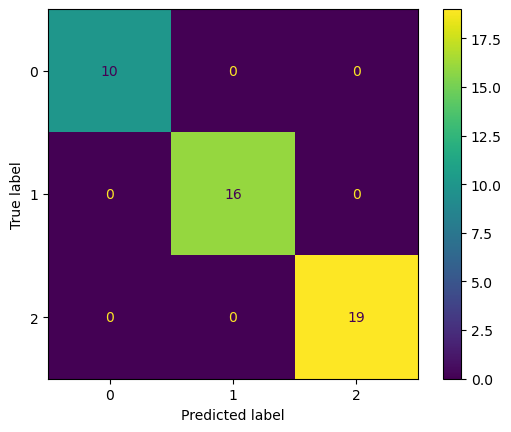

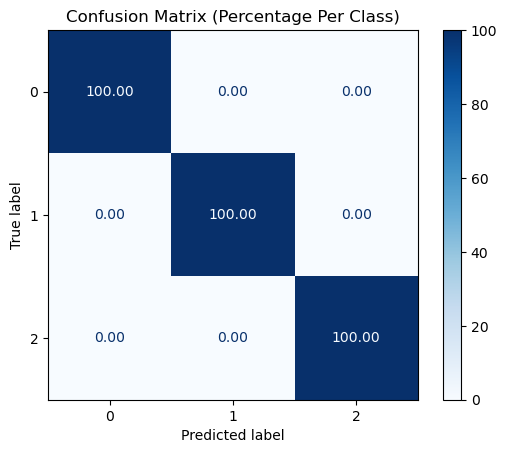

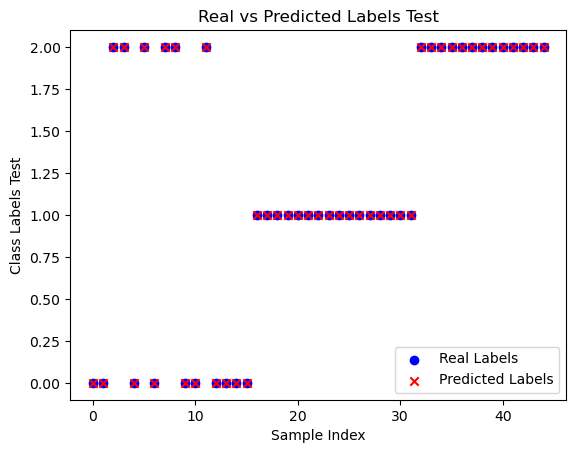

In [181]:
for t in range(epoch):
    error = np.zeros(3*num_train)
    r = np.zeros(3*num_train)

    for i in range(num_train):
        e = np.zeros(3)
        input_data = input_train[i, :]         # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1  # 100 * 1
        o1 = 2 / (1 + np.exp(-net1))           # 100 * 1
        net2 = np.dot(w2, o1) + bi2            # 20 * 1
        o2 = 2 / (1 + np.exp(-net2))           # 20 * 1
        net3 = np.dot(w3, o2) + bi3            # 2 * 1
        o3 = softmax(net3)                     # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[3*i] =e[0]
        error[3*i+1] =e[1]
        error[3*i+2] = e[2]
        r[3*i] = (k1+k2)*error[3*i] - k2*error[3*i-3]
        r[3*i+1] = (k1+k2)*error[3*i+1] - k2*error[3*i-2]
        r[3*i+2] = (k1+k2)*error[3*i+2] - k2*error[3*i-1]
        # active function
        t1 = (2*np.exp(-net2))/((1+np.exp(-net2))**2)
        A = np.diag(t1) #20 * 20

        t2 = (2*np.exp(-net1))/((1+np.exp(-net1))**2)
        B = np.diag(t2) # 100 * 100

        pw1 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw12 = -1*(k1+k2)*(target[2] - o3[2])*np.outer(np.dot(np.dot(w3[2, :], np.dot(A, w2)),B), input_data) 
        
        pw2 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)  
        pw22 = -1*(k1+k2)*(target[2] - o3[2])*np.outer(np.dot(w3[2,:], A), o1) 
        
        pw3[0,:] = -1*(k1+k2)*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(k1+k2)*(target[1] - o3[1])*o2
        pw31[2,:]= -1*(k1+k2)*(target[2] - o3[2])*o2
        
        pbi1 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi12 = -1*(k1+k2)*(target[2] - o3[2])*np.dot(np.dot(w3[2, :], np.dot(A, w2)),B)
        
        pbi2 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi22 = -1*(k1+k2)*(target[2] - o3[2])*np.dot(w3[2,:], A)
        
        pbi3[0] = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])
        pbi32[2] = -1*(target[2] - o3[2])

        a = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        a01 = pw12.ravel()
        
        b = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        b01 = pw22.ravel()
        
        c = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        c01 = pw32.ravel()
        
        d = pbi1.ravel()
        d0 = pbi11.ravel()
        d01 = pbi12.ravel()
        
        e = pbi2.ravel()
        e0 = pbi21.ravel()
        e01 = pbi22.ravel()
        
        f = pbi3.ravel()
        f0 = pbi31.ravel()
        f01 = pbi32.ravel()
        

        w_par[3*i, :] = np.concatenate((a, b, c, d, e, f))
        w_par[3*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0))
        w_par[3*i+2, :] = np.concatenate((a01, b01, c01, d01, e01, f01))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1


    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)

    #error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,3))
    e_train = np.zeros(num_train)
    r = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_train[i] - k2*e_train[i-1]

    mse_train[t] = np.mean(r)

    #error_square_test = np.zeros(num_test)
    e_test = np.zeros(num_test)
    r = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 3))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_test[i] - k2*e_test[i-1]

    mse_test[t] = np.mean(r)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Flexible MLP**

In [36]:
n1, n2, n3, n4 = input.shape[1], 100, 50, 3
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.8
epoch = 45

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1

# W_per is Jakubian Matrix
w_par = np.zeros((3*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pw12 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
pbi12 = np.zeros(n2)
palpha1 = np.zeros(n2)
palpha11 = np.zeros(n2)
palpha12 = np.zeros(n2)
#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pw22 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
pbi22 = np.zeros(n3)
palpha2 = np.zeros(n3)
palpha21 = np.zeros(n3)
palpha22 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pw31 = np.zeros((n4, n3))
pw32 = np.zeros((n4, n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)
pbi32 = np.zeros(n4)

5853


**implemention Flexible MLP**

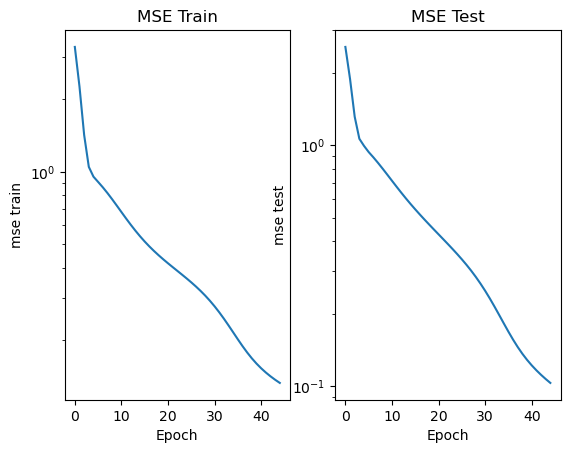

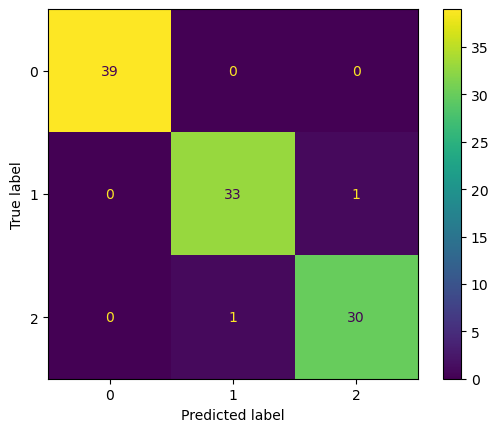

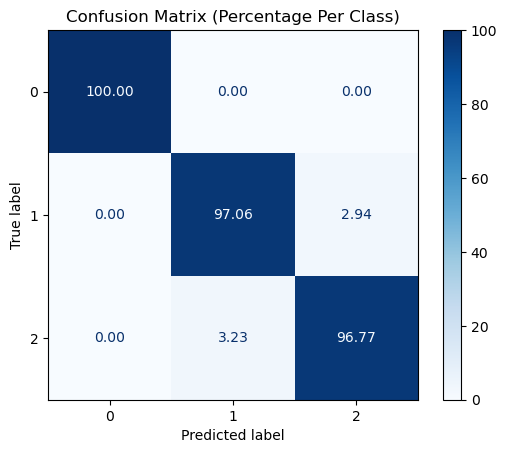

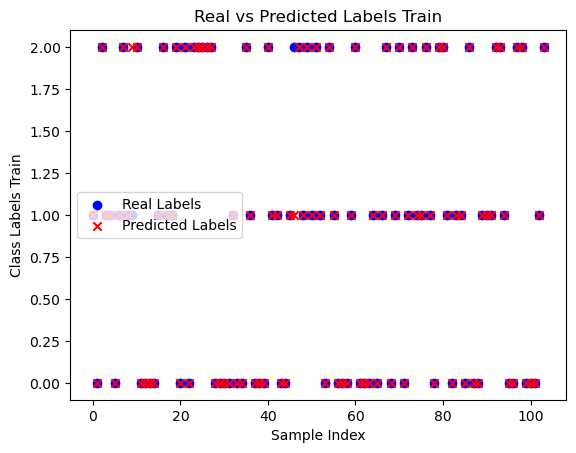

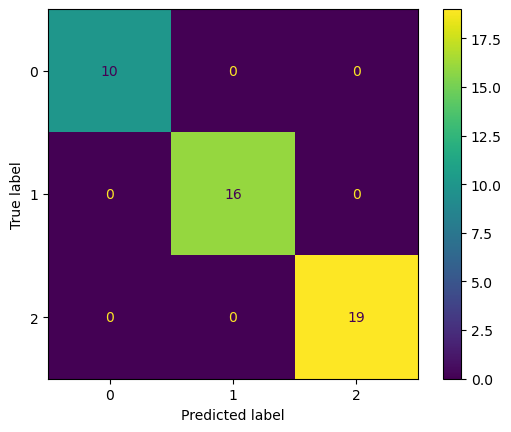

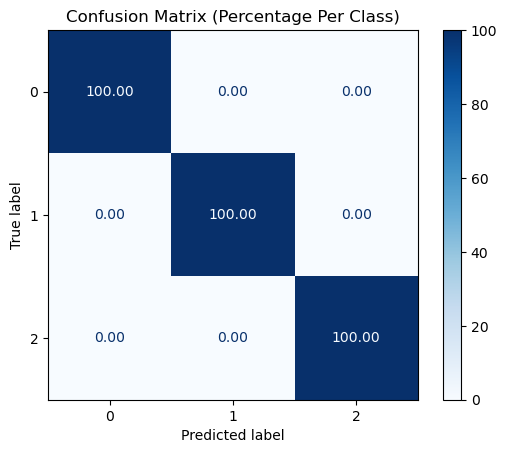

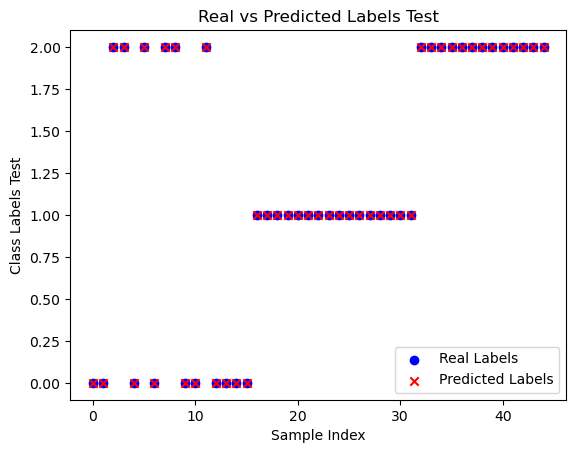

In [39]:
for t in range(epoch):
    error = np.zeros(3*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = softmax(net3)                    # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[3*i] = e[0]
        error[3*i+1] = e[1]
        error[3*i+2] = e[2]

        # active function fprim
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100
        
        #f star
        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)

        
        pw1 = -1*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw12 = -1*(target[2] - o3[2])*np.outer(np.dot(np.dot(w3[2, :], np.dot(A, w2)),B), input_data) 
        
        pw2 = -1*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw22 = -1*(target[2] - o3[2])*np.outer(np.dot(w3[2,:], A), o1)
        
        pw3[0,:]=-1*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(target[1] - o3[1])*o2
        pw31[2,:]= -1*(target[2] - o3[2])*o2
        
        pbi1 = -1*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi12 = -1*(target[2] - o3[2])*np.dot(np.dot(w3[2, :], np.dot(A, w2)),B)
        
        pbi2 = -1*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi22 = -1*(target[2] - o3[2])*np.dot(w3[2,:], A)
        
        pbi3[0] = -1*(target[0] - o3[0])
        pbi31[1] = -1*(target[1] - o3[1])
        pbi32[1] = -1*(target[2] - o3[2])
        
        palpha1 = -1 *(target[0] - o3[0])*np.dot(np.dot(np.dot(w3[0, :],A),w2),C)  #100*1
        palpha11 = -1 *(target[1] - o3[1])*np.dot(np.dot(np.dot(w3[1, :],A),w2),C) #100*1
        palpha12 = -1 *(target[2] - o3[2])*np.dot(np.dot(np.dot(w3[2, :],A),w2),C) #100*1
        
        palpha2 = -1 *(target[0] - o3[0])*np.dot(w3[0, :], D) 
        palpha21 = -1 *(target[1] - o3[1])*np.dot(w3[1, :], D) 
        palpha22 = -1 *(target[2] - o3[2])*np.dot(w3[2, :], D) 

        a  = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        a01 = pw12.ravel()
        b  = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        b01 = pw22.ravel() # 1 * 2000
        c  = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        c01 = pw32.ravel() # 1 * 20
        d  = pbi1.ravel()
        d0 = pbi11.ravel()
        d01 = pbi12.ravel()
        e  = pbi2.ravel()
        e0 = pbi21.ravel()
        e01 = pbi22.ravel()
        f  = pbi3.ravel()
        f0 = pbi31.ravel()
        f01 = pbi32.ravel()
        g  = palpha1.ravel()  # 1 * 100
        g0 = palpha11.ravel()
        g01 = palpha12.ravel()
        h  = palpha2.ravel()
        h0 = palpha21.ravel()
        h01 = palpha22.ravel()
        
        w_par[3*i, :] = np.concatenate((a, b, c, d, e, f,g ,h))
        w_par[3*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0, g0, h0))
        w_par[3*i+2, :] = np.concatenate((a01, b01, c01, d01, e01, f01, g01, h01))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(error, error.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    e_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,3))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))

    mse_train[t] = np.mean(e_train)

    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 3))
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        
    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()

**initialize Emotional and Flexible MLP**

In [44]:
n1, n2, n3, n4 = input.shape[1], 100, 50, 3
print( n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3)
eta = 0.8
epoch = 40

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a, b = -1, 1
k1,k2 = 0.8,0.2

# W_per is Jakubian Matrix
w_par = np.zeros((3*num_train, n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 +n2 + n3))
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3 + n2 + n3 + n4 + n2 + n3)

#layer 1 information
np.random.seed(42)
w1 = np.random.uniform(a, b, (n2, n1))
bi1 = np.random.uniform(a,b, n2)
alpha1 = np.random.uniform(a, b, n2)
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))
pw11 = np.zeros((n2, n1))
pw12 = np.zeros((n2, n1))
pbi1 = np.zeros(n2)
pbi11 = np.zeros(n2)
pbi12 = np.zeros(n2)
palpha1 = np.zeros(n2)
palpha11 = np.zeros(n2)
palpha12 = np.zeros(n2)
#layer 2 information
w2 = np.random.uniform(a, b, (n3, n2))
bi2 = np.random.uniform(a, b, n3)
alpha2 = np.random.uniform(a, b, n3)
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))
pw21 = np.zeros((n3, n2))
pw22 = np.zeros((n3, n2))
pbi2 = np.zeros(n3)
pbi21 = np.zeros(n3)
pbi22 = np.zeros(n3)
palpha2 = np.zeros(n3)
palpha21 = np.zeros(n3)
palpha22 = np.zeros(n3)

#layer 3 information
w3 = np.random.uniform(a, b, (n4, n3))
bi3 = np.random.uniform(a, b, n4)
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))
pw31 = np.zeros((n4, n3))
pw32 = np.zeros((n4, n3))
pbi3 = np.zeros(n4)
pbi31 = np.zeros(n4)
pbi32 = np.zeros(n4)

5853


**implemention Flexible and Emotional MLP**

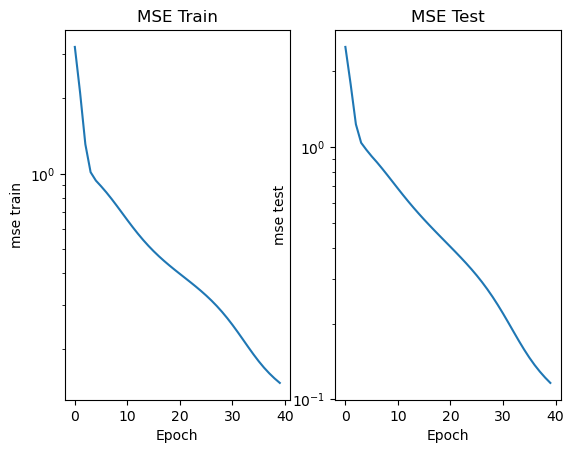

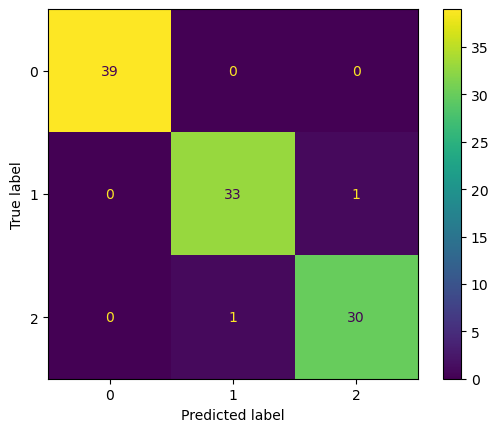

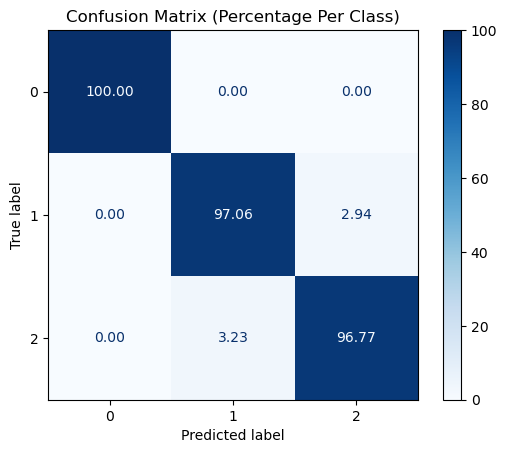

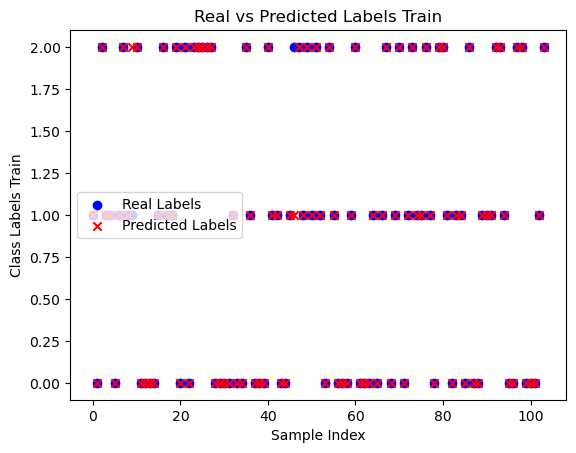

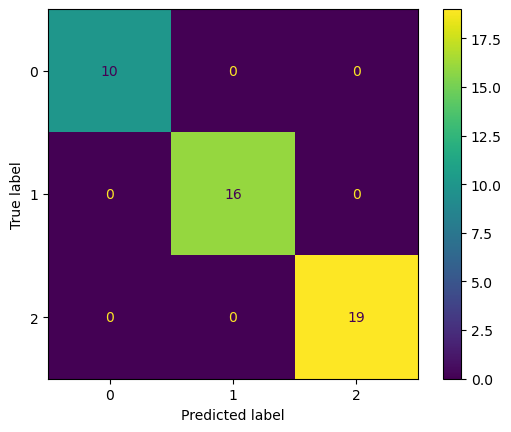

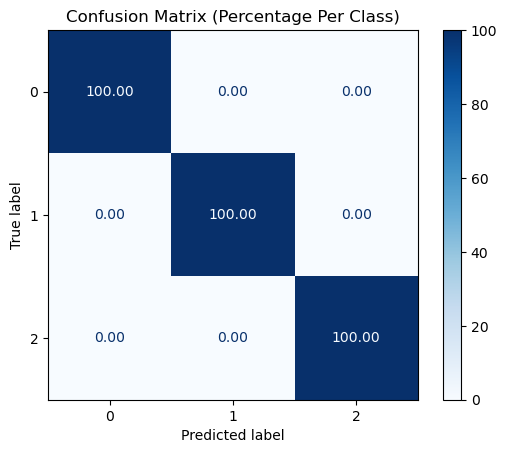

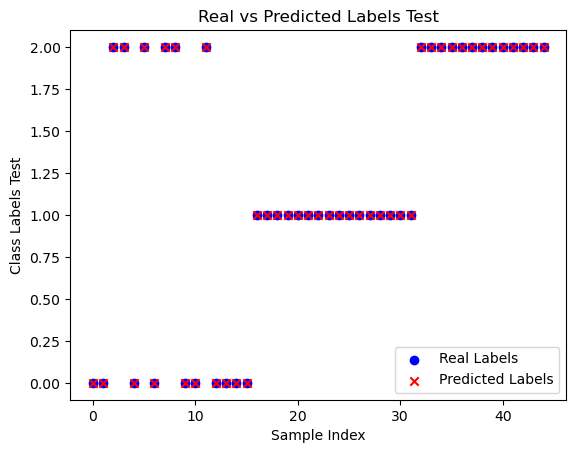

In [47]:
for t in range(epoch):
    error = np.zeros(3*num_train)
    r = np.zeros(3*num_train)
    for i in range(num_train):
        input_data = input_train[i, :]              # 1*22    W1 = 100*22, W2 = 20*100, W3 = 1*20
        net1 = np.dot(w1, input_data.T) + bi1 # 100 * 1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))          # 100 * 1
        net2 = np.dot(w2, o1) + bi2           # 20 * 1
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))          # 20 * 1
        net3 = np.dot(w3, o2) + bi3           # 2 * 1
        o3 = softmax(net3)                    # 1 * 1
        target = output_train[i, :]
        e = -target*np.log(o3)
        error[3*i] = e[0]
        error[3*i+1] = e[1]
        error[3*i+2] = e[2]
        r[3*i] = (k1+k2)*error[3*i] - k2*error[3*i-3]
        r[3*i+1] = (k1+k2)*error[3*i+1] - k2*error[3*i-2]
        r[3*i+2] = (k1+k2)*error[3*i+2] - k2*error[3*i-1]

        # active function fprim
        t1 = (2*np.exp(-net2*alpha2)*alpha2**2)/(1+np.exp(-net2*alpha2))**2
        #t1 = (o2/2)* (1 - o2/2) # 20 * 1
        A = np.diag(t1) #20 * 20
        t2 = (2*np.exp(-net1*alpha1)*alpha1**2)/(1+np.exp(-net1*alpha1))**2
        #t2 = (o1/2) * (1 - o1/2) # 100 * 1
        B = np.diag(t2) # 100 * 100
        
        #f star
        ts1 = (2*(1+np.exp(-net1*alpha1))+2*alpha1*net1*np.exp(-net1*alpha1))/(1+np.exp(-net1*alpha1))**2
        C = np.diag(ts1)                            #100*100

        ts2 = (2*(1+np.exp(-net2*alpha2))+2*alpha2*net2*np.exp(-net2*alpha2))/(1+np.exp(-net2*alpha2))**2    #20*1
        D = np.diag(ts2)

        
        pw1 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(np.dot(w3[0, :], np.dot(A, w2)),B), input_data)
        pw11 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(np.dot(w3[1, :], np.dot(A, w2)),B), input_data) 
        pw12 = -1*(k1+k2)*(target[2] - o3[2])*np.outer(np.dot(np.dot(w3[2, :], np.dot(A, w2)),B), input_data) 
        
        pw2 = -1*(k1+k2)*(target[0] - o3[0])*np.outer(np.dot(w3[0,:], A), o1) 
        pw21 = -1*(k1+k2)*(target[1] - o3[1])*np.outer(np.dot(w3[1,:], A), o1)
        pw22 = -1*(k1+k2)*(target[2] - o3[2])*np.outer(np.dot(w3[2,:], A), o1)
        
        pw3[0,:]=-1*(k1+k2)*(target[0] - o3[0])*o2  
        pw31[1,:]= -1*(k1+k2)*(target[1] - o3[1])*o2
        pw31[2,:]= -1*(k1+k2)*(target[2] - o3[2])*o2
        
        pbi1 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(w3[0, :], np.dot(A, w2)),B)
        pbi11 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(w3[1, :], np.dot(A, w2)),B)
        pbi12 = -1*(k1+k2)*(target[2] - o3[2])*np.dot(np.dot(w3[2, :], np.dot(A, w2)),B)
        
        pbi2 = -1*(k1+k2)*(target[0] - o3[0])*np.dot(w3[0,:], A)
        pbi21 = -1*(k1+k2)*(target[1] - o3[1])*np.dot(w3[1,:], A)
        pbi22 = -1*(k1+k2)*(target[2] - o3[2])*np.dot(w3[2,:], A)
        
        pbi3[0] = -1*(k1+k2)*(target[0] - o3[0])
        pbi31[1] = -1*(k1+k2)*(target[1] - o3[1])
        pbi32[1] = -1*(k1+k2)*(target[2] - o3[2])
        
        palpha1 = -1 *(k1+k2)*(target[0] - o3[0])*np.dot(np.dot(np.dot(w3[0, :],A),w2),C)  #100*1
        palpha11 = -1 *(k1+k2)*(target[1] - o3[1])*np.dot(np.dot(np.dot(w3[1, :],A),w2),C) #100*1
        palpha12 = -1 *(k1+k2)*(target[2] - o3[2])*np.dot(np.dot(np.dot(w3[2, :],A),w2),C) #100*1
        
        palpha2 = -1 *(k1+k2)*(target[0] - o3[0])*np.dot(w3[0, :], D) 
        palpha21 = -1 *(k1+k2)*(target[1] - o3[1])*np.dot(w3[1, :], D) 
        palpha22 = -1 *(k1+k2)*(target[2] - o3[2])*np.dot(w3[2, :], D) 

        a  = pw1.ravel() # 1 * 300
        a0 = pw11.ravel()
        a01 = pw12.ravel()
        b  = pw2.ravel() # 1 * 2000
        b0 = pw21.ravel() # 1 * 2000
        b01 = pw22.ravel() # 1 * 2000
        c  = pw3.ravel() # 1 * 20
        c0 = pw31.ravel() # 1 * 20
        c01 = pw32.ravel() # 1 * 20
        d  = pbi1.ravel()
        d0 = pbi11.ravel()
        d01 = pbi12.ravel()
        e  = pbi2.ravel()
        e0 = pbi21.ravel()
        e01 = pbi22.ravel()
        f  = pbi3.ravel()
        f0 = pbi31.ravel()
        f01 = pbi32.ravel()
        g  = palpha1.ravel()  # 1 * 100
        g0 = palpha11.ravel()
        g01 = palpha12.ravel()
        h  = palpha2.ravel()
        h0 = palpha21.ravel()
        h01 = palpha22.ravel()
        
        w_par[3*i, :] = np.concatenate((a, b, c, d, e, f,g ,h))
        w_par[3*i+1, :] = np.concatenate((a0, b0, c0, d0, e0, f0, g0, h0))
        w_par[3*i+2, :] = np.concatenate((a01, b01, c01, d01, e01, f01, g01, h01))

    a1 = w1.ravel()  # 1 * 500
    b1 = w2.ravel()  # 1 * 2000
    c1 = w3.ravel()  # 1 * 20
    d1 = bi1.ravel() # 1 * 100
    e1 = bi2.ravel() # 1 * 20
    f1 = bi3.ravel() # 1 * 1
    g1 = alpha1.ravel()
    h1 = alpha2.ravel()

    # this is my W matrix
    w_par1 = np.concatenate((a1, b1, c1, d1, e1, f1, g1, h1))
    miu = 1  * (np.dot(r, r.T))
    # W(K+1)
    w_par1 = w_par1 -eta*np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), np.dot(w_par.T, error))

    a2 = w_par1[:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n3*n4]
    d2 = w_par1[n2 * n1 + n3 * n2 + n3*n4:n2 * n1 + n3 * n2 + n3*n4 + n2]
    e2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3]
    f2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3:n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4]
    g2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4: n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2]
    h2 = w_par1[n2 * n1 + n3 * n2 + n3*n4 + n2 +n3+n4 +n2:]

    w1 =  a2.reshape(n2, n1)
    w2 =  b2.reshape(n3, n2)
    w3 =  c2.reshape(n4, n3)
    bi1 = d2.reshape(n2)
    bi2 = e2.reshape(n3)
    bi3 = f2.reshape(n4)
    apha1 = g2.reshape(n2)
    alpha2 = h2.reshape(n3)

    e_train = np.zeros(num_train)
    r = np.zeros(num_train)
    output_data_train = np.zeros((num_train,3))
    for i in range(num_train):
        input_data = input_train[i, :]
        net1 = np.dot(w1, input_data) +bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) +bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_train[i, :]
        output_data_train[i, :] = o3
        e_train[i] = np.sum(-target*np.log(o3))
        r[i] = (k1+k2)*e_train[i] - k2*e_train[i-1]

    mse_train[t] = np.mean(e_train)

    e_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test, 3))
    r = np.zeros(num_test)
    for i in range(num_test):
        input_data = input_test[i, :]
        net1 = np.dot(w1, input_data) + bi1
        o1 = 2*alpha1 / (1 + np.exp(-net1*alpha1))
        net2 = np.dot(w2, o1) + bi2
        o2 = 2*alpha2 / (1 + np.exp(-net2*alpha2))
        net3 = np.dot(w3, o2) + bi3
        o3 = softmax(net3)
        target = output_test[i, :]
        output_data_test[i, :] = o3
        e_test[i] = np.sum(-target*np.log(o3))
        r[i]  =(k1+k2)*e_test[i] - k2*e_test[i-1]
        
    mse_test[t] = np.mean(e_test)

plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('mse train')


# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')
#plot confusion matrix for train data

actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0, 1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()